In [8]:
from lib.VisualizationProvider import (plot_2d_distributions, 
                                       plot_scatter, 
                                       plot_gaussian_distributions,
                                       plot_heatmap,
                                       plot_comparison_heatmaps,
                                       qq_plot
                                      )

from lib.FeatureProvider import (load_all_grids, 
                                 load_all_grids_randparams,
                                 reduce_dimensionality_umap, 
                                 reduce_dimensionality_kpca, 
                                 reduce_dimensionality_tsne
                                )

from lib.StaticMetricProvider import (test_all_introspection_technique_combinations, 
                                      calc_distributions, 
                                      get_values_from_distance_matrix, 
                                      difference_distances, 
                                      apply_log_to_distances,
                                      kld_jsd_per_technique,
                                      ks_test
                                     )

# Reduce (CNN, Cifar) using Dim. Reduction, compare Gaussian Distributions and Plot

In [9]:
MODEL_TYPE = "cnn"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams"
MAX_IMAGES = 100

In [ ]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)
all_grids_3 = load_all_grids_randparams(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading i

In [4]:
# Use all_grids3 like this: all_grids_3['kind']['layer'])
# Kind = Sequential / Cascading
# Layer = 0/2/4_Linear, 8/10/13/15/18/20_Conv2d

In [11]:
ks_test(all_grids_1, all_grids_2)

print('-'*75)
print("Comparison between correct and RandParams")

ks_test(all_grids_1, all_grids_3['Sequential']['20_Conv2d'])

KS Test Summary:
Technique: vgrads
Count likely same: 2
Technique: dl
Count likely same: 0
Technique: backprop
Count likely same: 0
Technique: ig
Count likely same: 0
Technique: g_t_i
Count likely same: 0


Technique: vgrads
Count likely different: 98
Technique: dl
Count likely different: 100
Technique: backprop
Count likely different: 100
Technique: ig
Count likely different: 100
Technique: g_t_i
Count likely different: 100


Technique: vgrads
Count unclear: 0
Technique: dl
Count unclear: 0
Technique: backprop
Count unclear: 0
Technique: ig
Count unclear: 0
Technique: g_t_i
Count unclear: 0
---------------------------------------------------------------------------
Comparison between correct and RandParams
KS Test Summary:
Technique: vgrads
Count likely same: 4
Technique: dl
Count likely same: 1
Technique: backprop
Count likely same: 0
Technique: ig
Count likely same: 0
Technique: g_t_i
Count likely same: 1


Technique: vgrads
Count likely different: 95
Technique: dl
Count likely diff

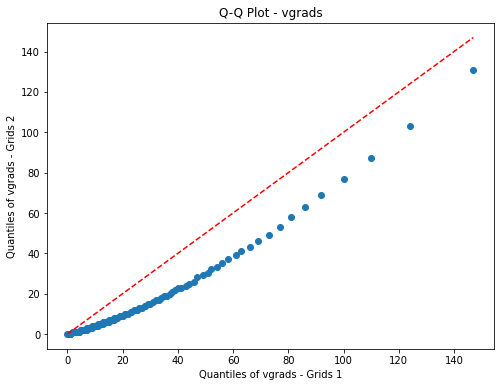

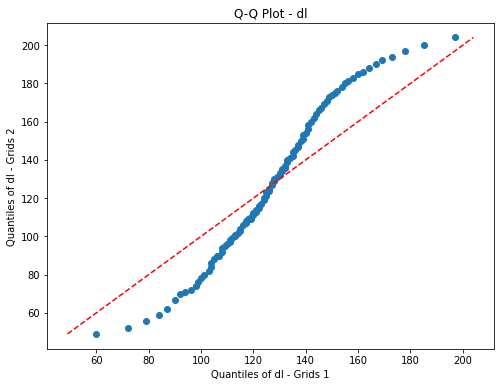

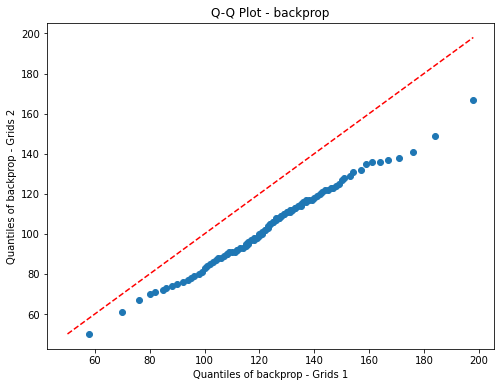

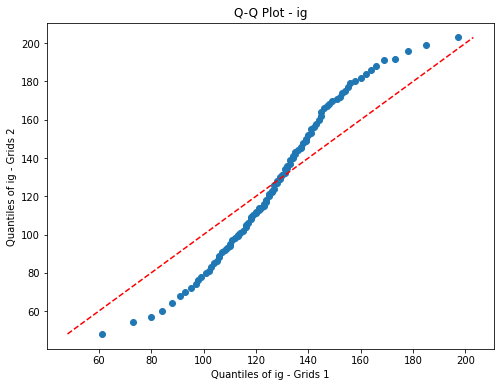

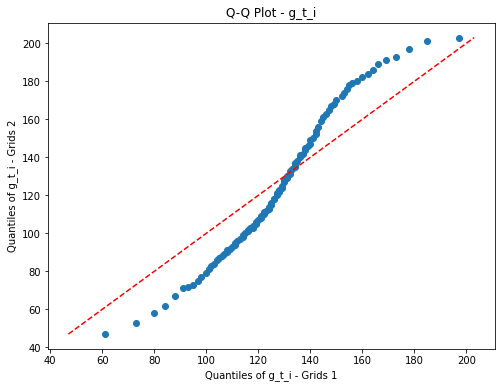

In [6]:
qq_plot(all_grids_1, all_grids_2)

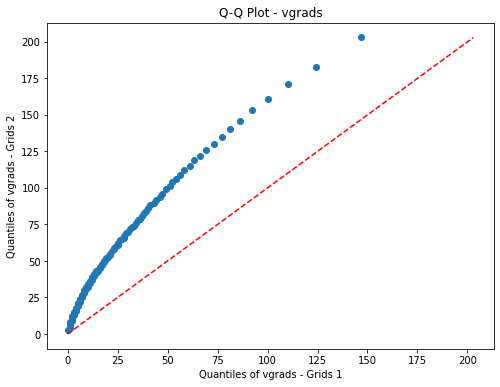

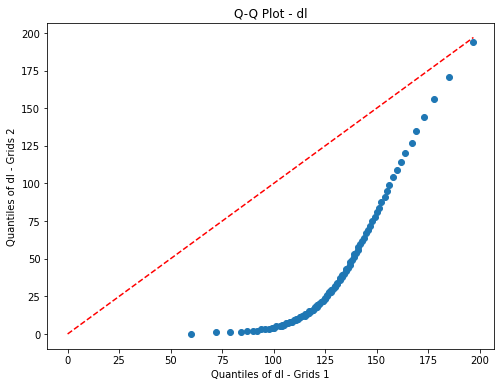

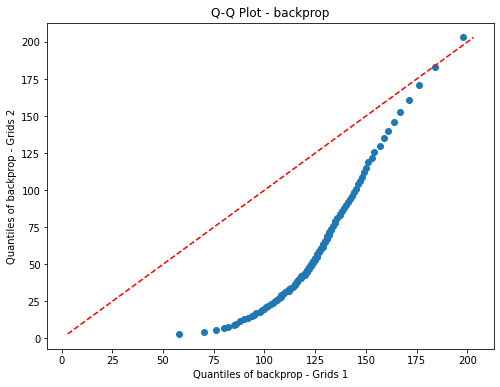

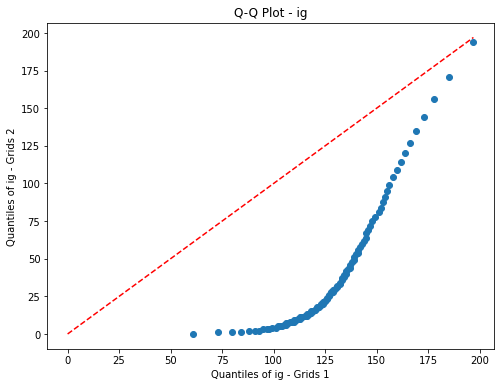

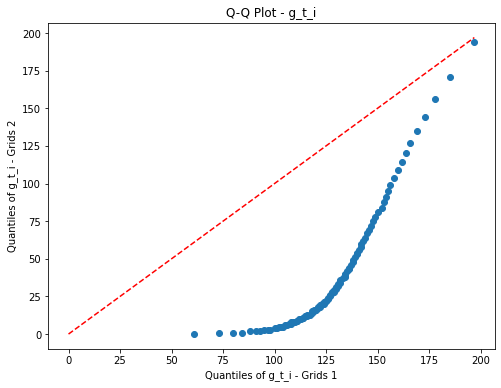

In [8]:
qq_plot(all_grids_1, all_grids_3['Cascading']['20_Conv2d'])

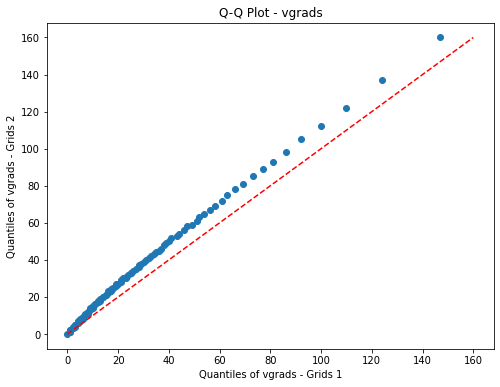

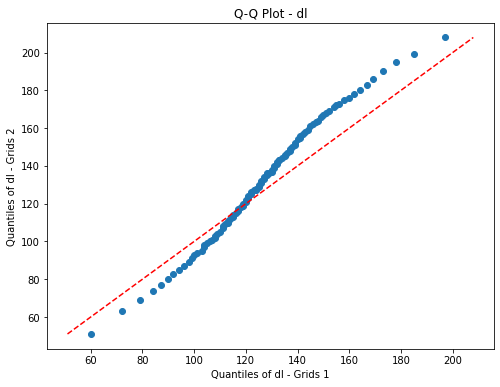

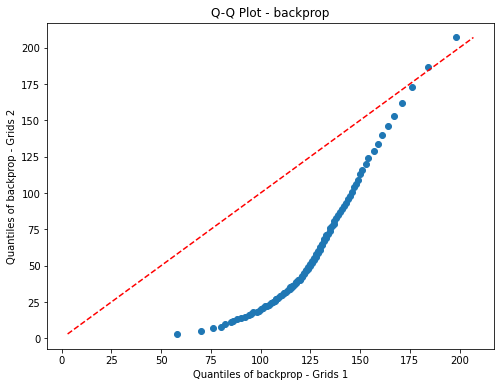

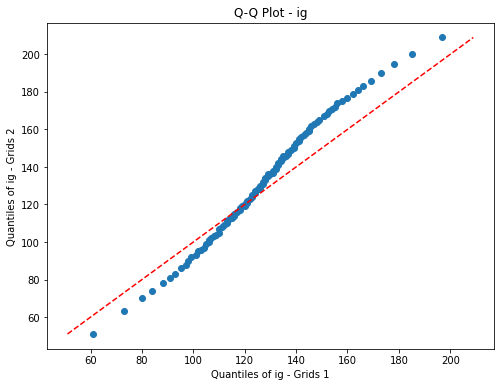

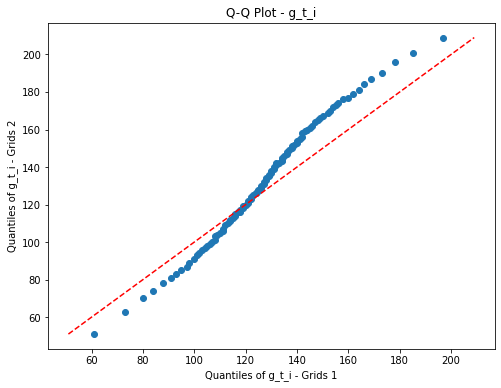

In [9]:
qq_plot(all_grids_1, all_grids_3['Sequential']['20_Conv2d'])

## UMap

In [ ]:
all_grids_1_umap = reduce_dimensionality_umap(all_grids_1, 2)
all_grids_2_umap = reduce_dimensionality_umap(all_grids_2, 2)

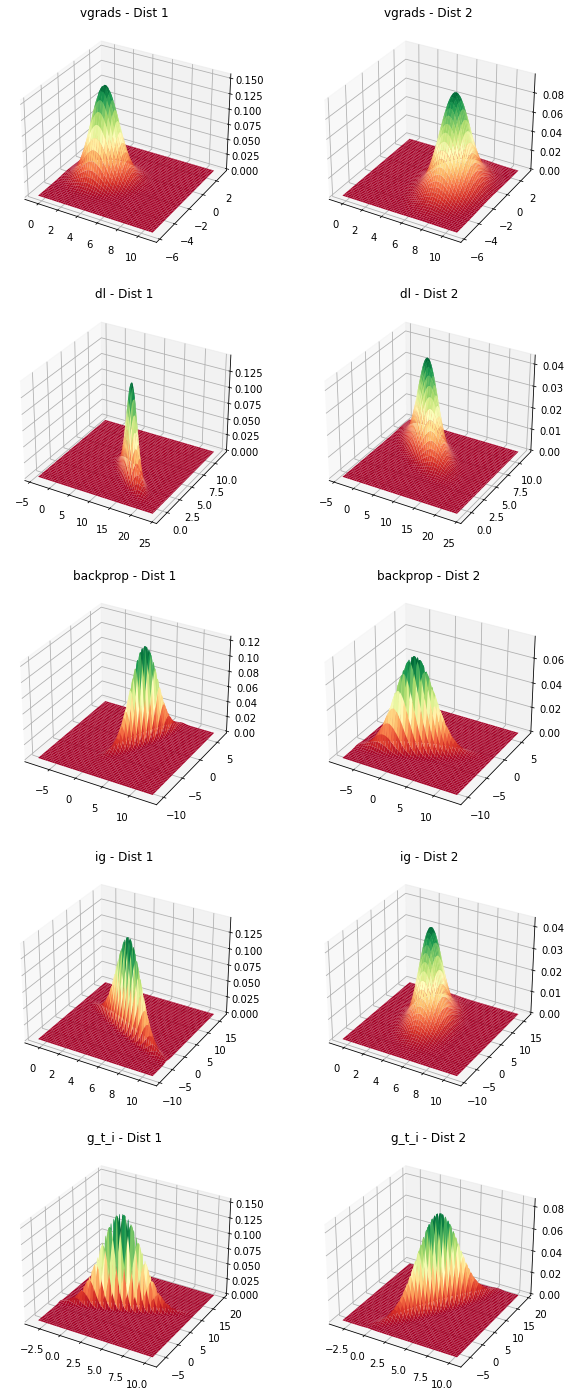

In [5]:
plot_2d_distributions(all_grids_1_umap, all_grids_2_umap)

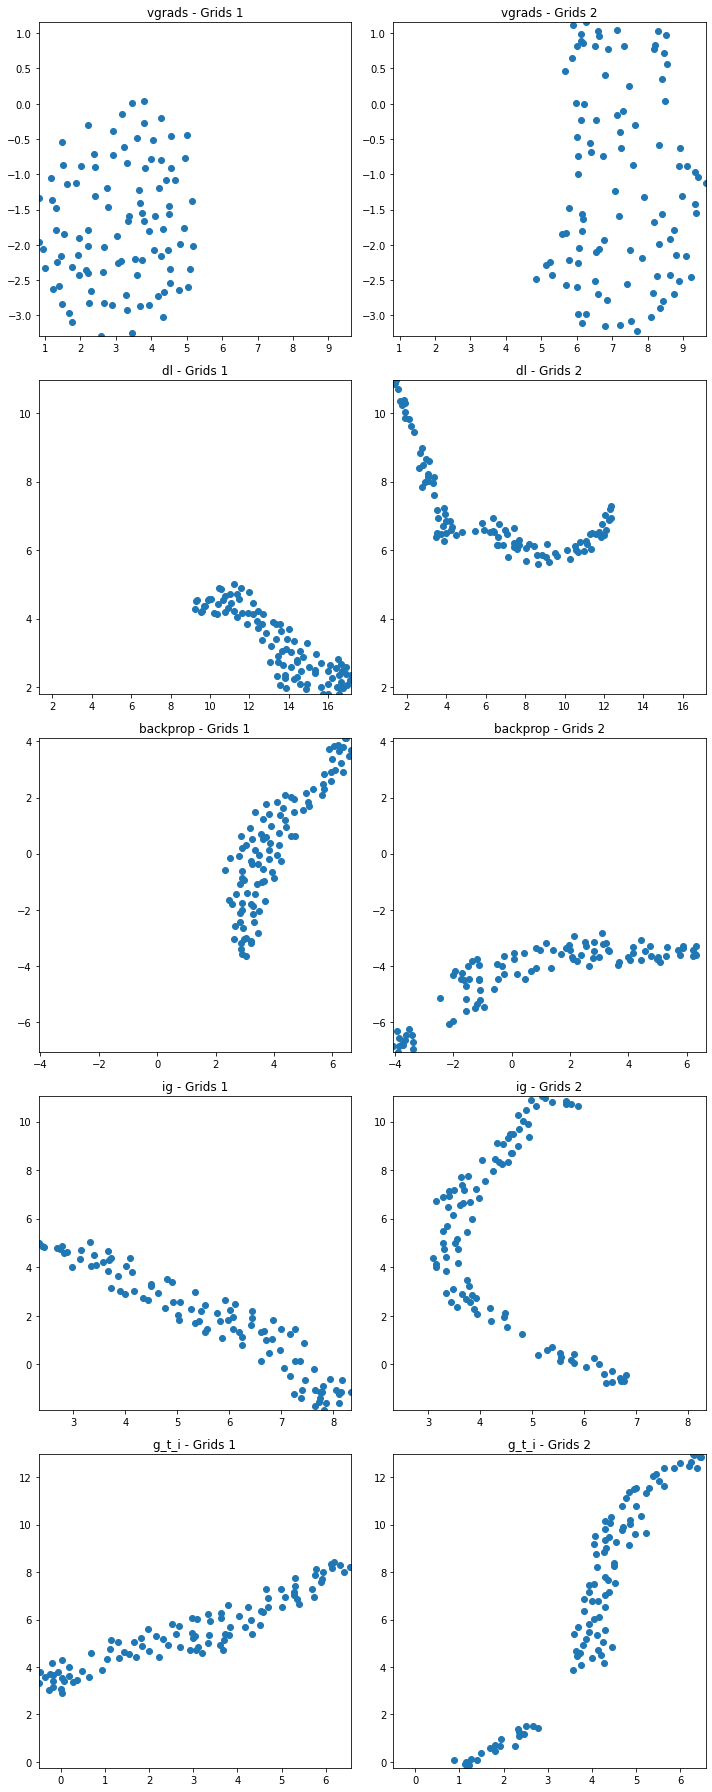

In [6]:
plot_scatter(all_grids_1_umap, all_grids_2_umap)

## tSNE (Some strange results)

In [7]:
all_grids_1_tsne =reduce_dimensionality_tsne(all_grids_1, 2)
all_grids_2_tsne =reduce_dimensionality_tsne(all_grids_2, 2)

Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...


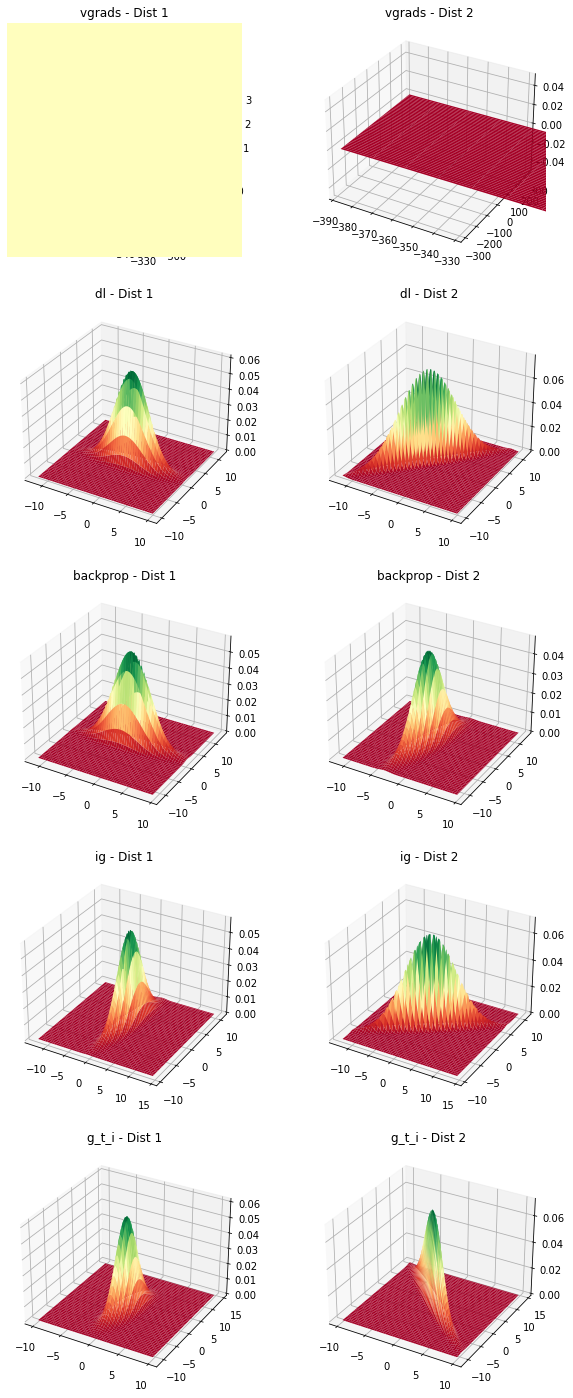

In [13]:
# Appears to be broken for vGrads. For some reason the points are distributed over a wide span (see Scatterplot below)
plot_2d_distributions(all_grids_1_tsne, all_grids_2_tsne)

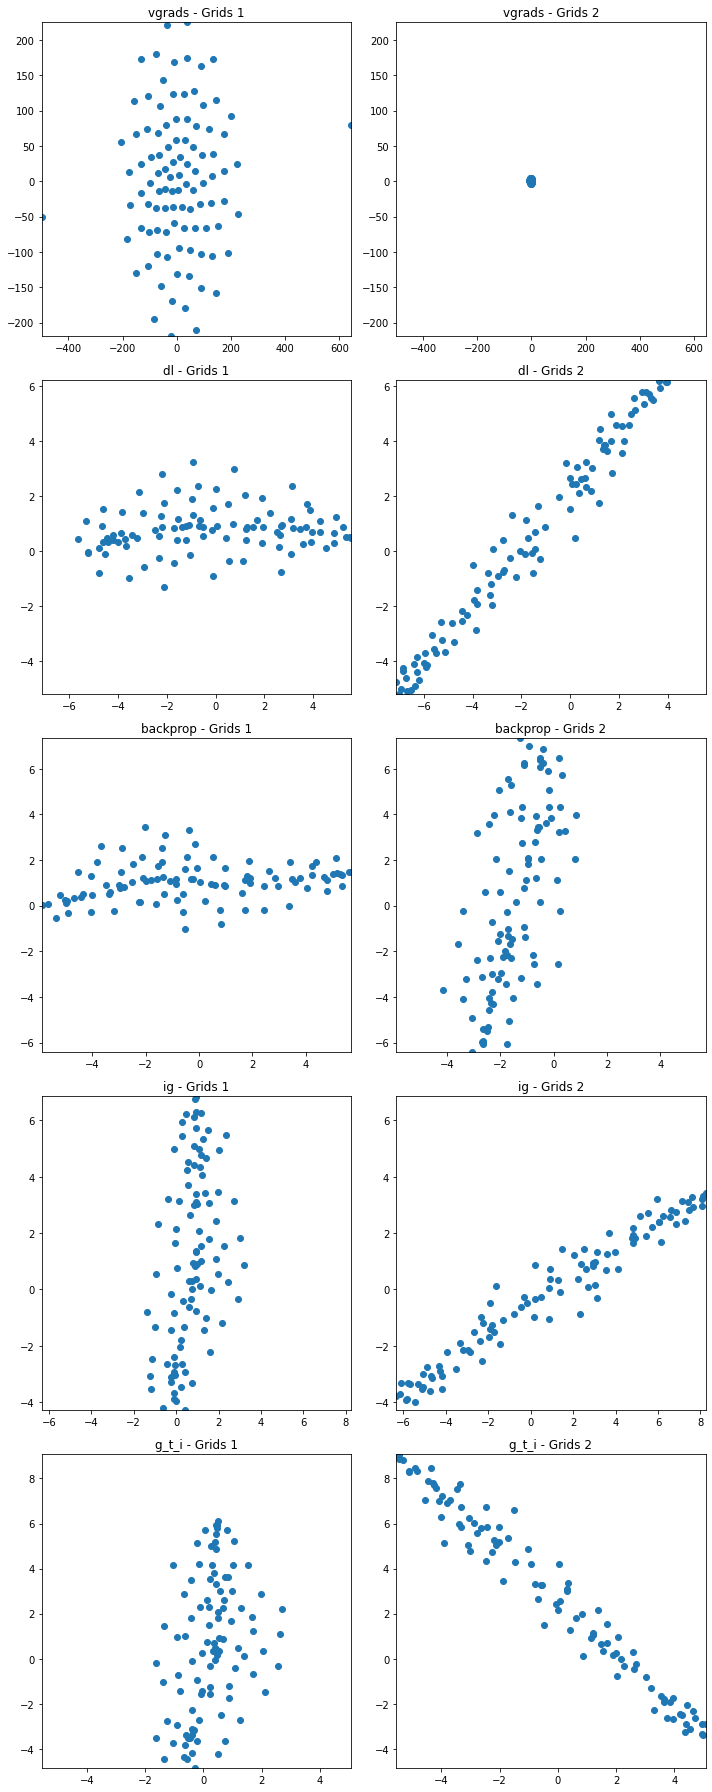

In [12]:
plot_scatter(all_grids_1_tsne, all_grids_2_tsne)

## kPCA

In [20]:
# Linear kernel
all_grids_1_kpca_linear = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='linear')
all_grids_2_kpca_linear = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='linear')

# Poly kernel
all_grids_1_kpca_poly = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='poly')
all_grids_2_kpca_poly = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='poly')

# Sigmoid kernel
all_grids_1_kpca_sigmoid = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='sigmoid')
all_grids_2_kpca_sigmoid = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='sigmoid')

# Cosine kernel
all_grids_1_kpca_cosine = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='cosine')
all_grids_2_kpca_cosine = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='cosine')


Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensional

Plots for Linear Kernel


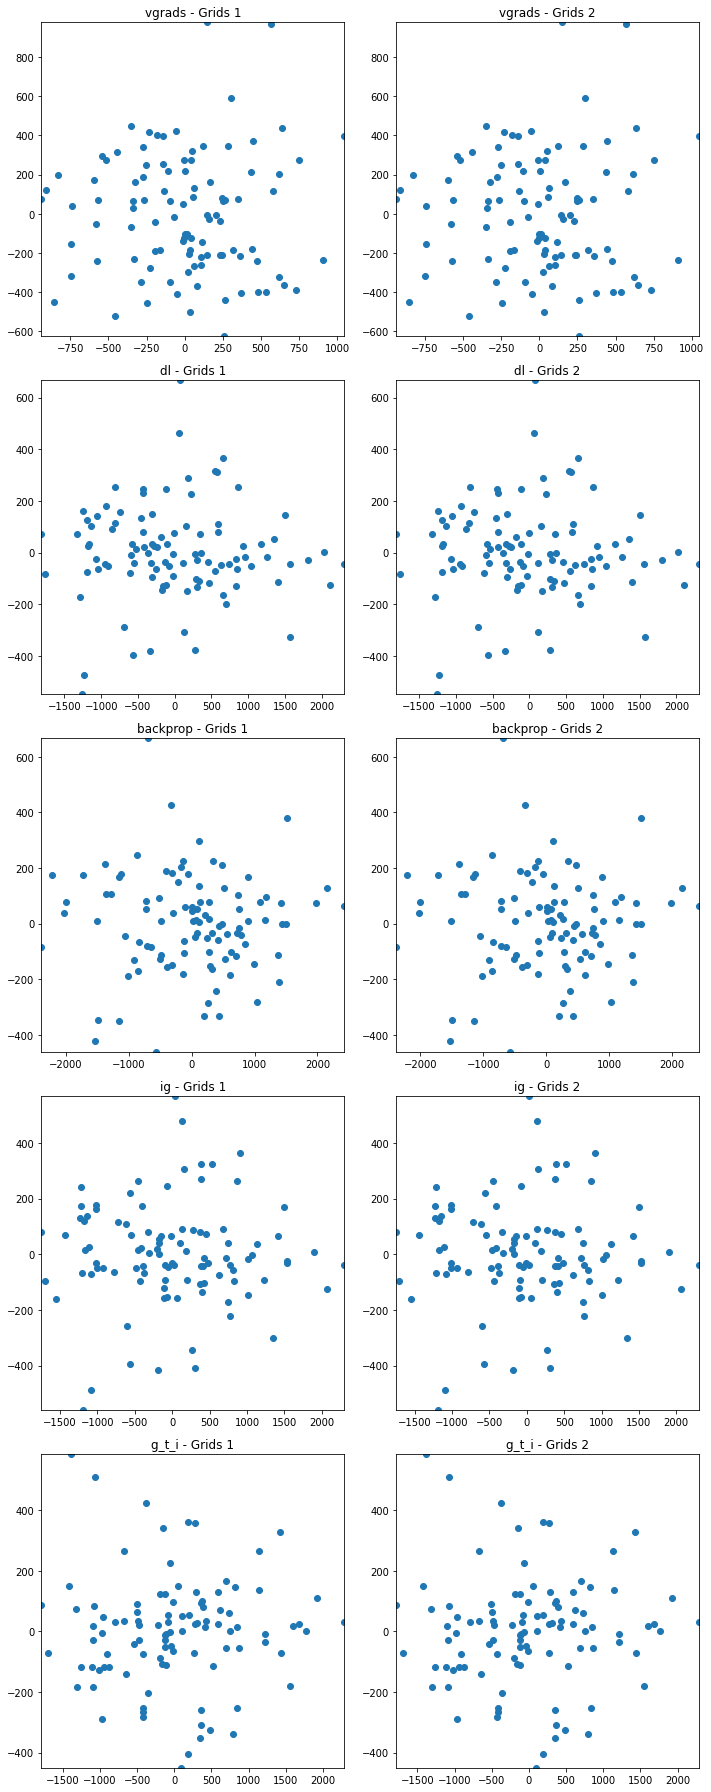

---------------------------------------------------------------------------
Plots for Poly Kernel


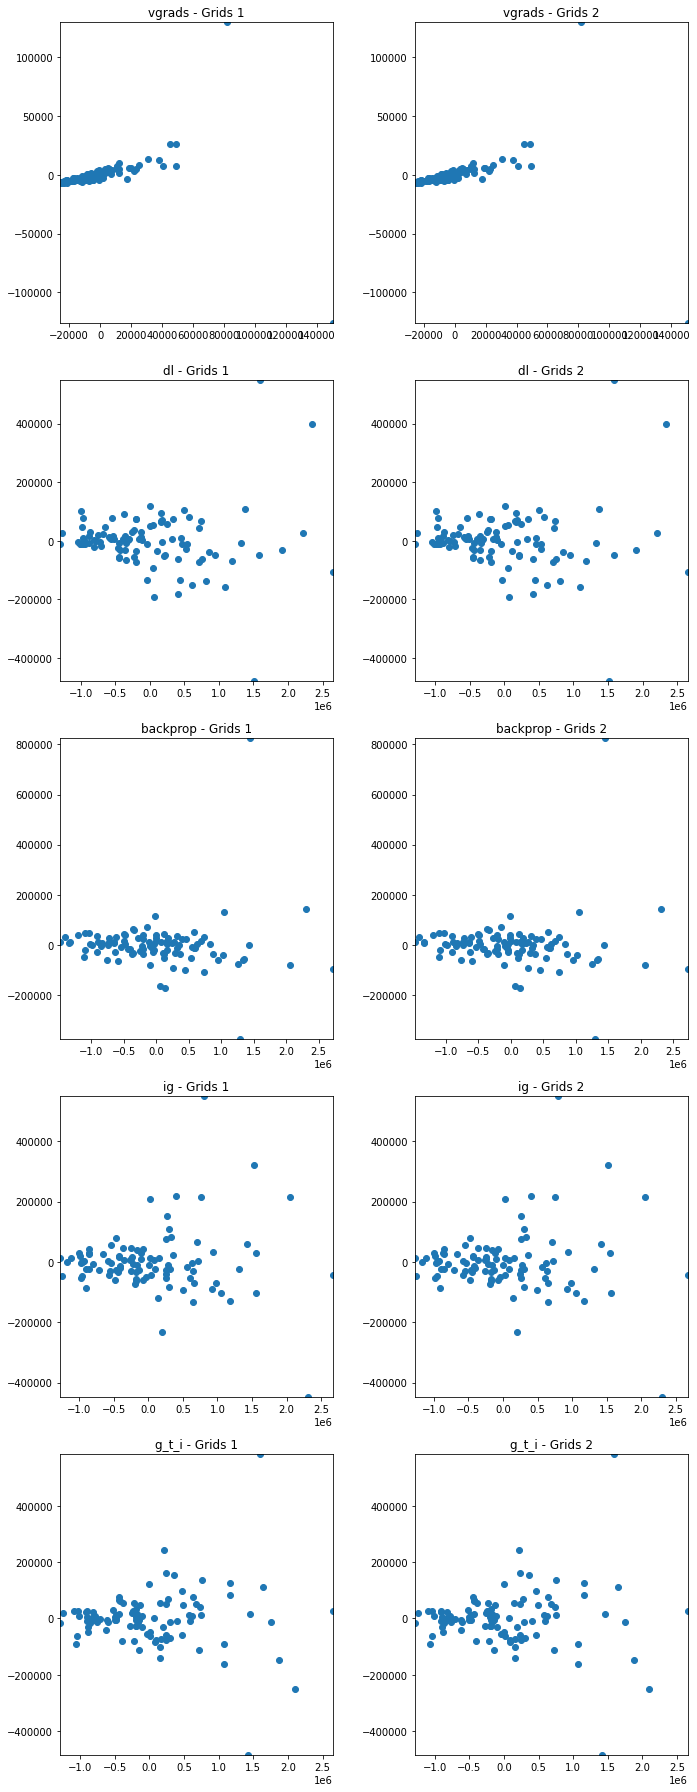

---------------------------------------------------------------------------
Plots for Cosine Kernel


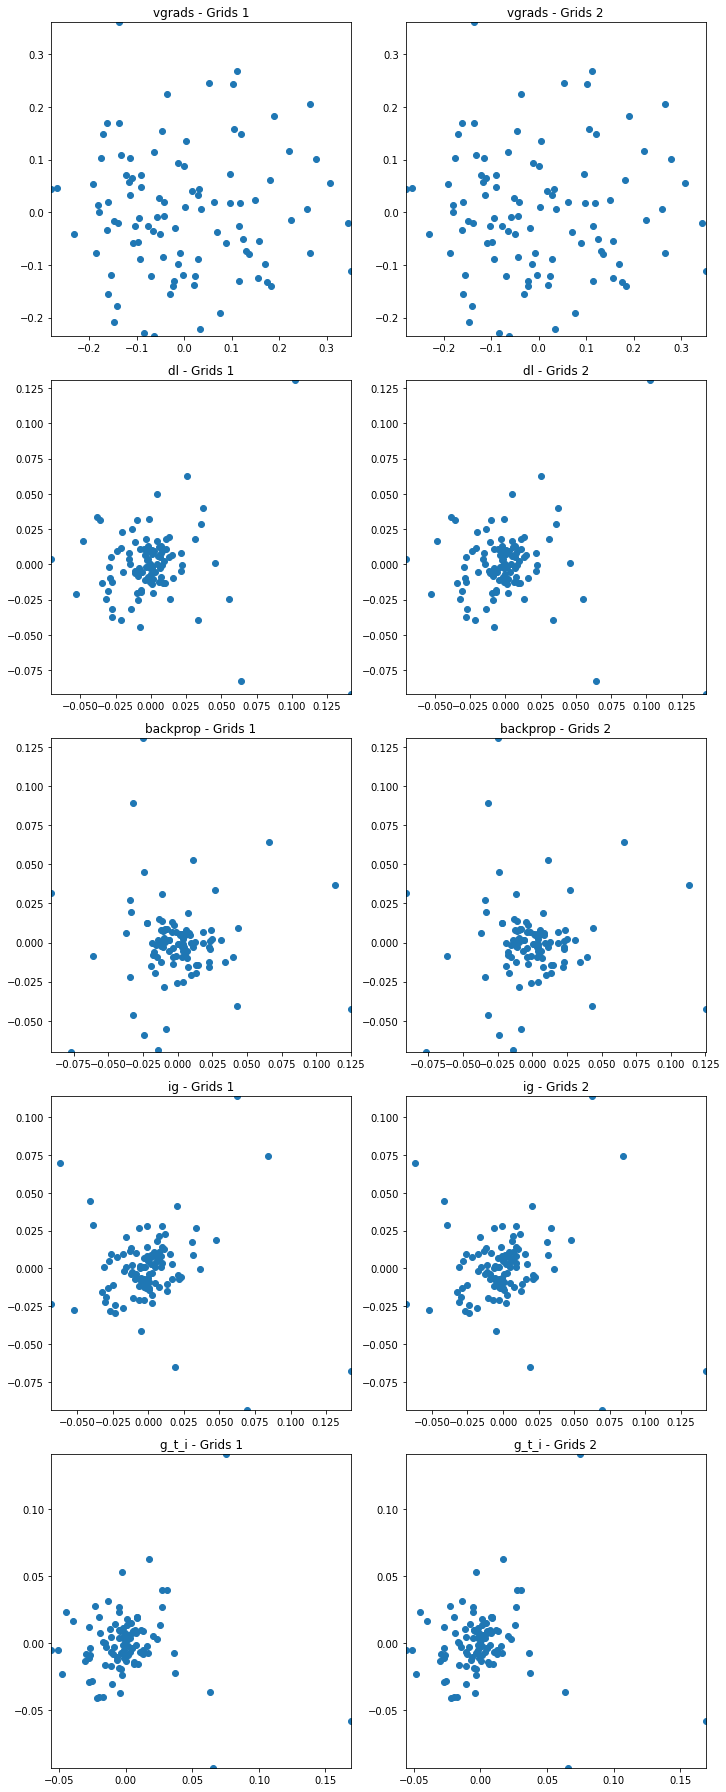

---------------------------------------------------------------------------
Plots for Sigmoid Kernel


/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:302: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i, 0].set_xlim([x_min, x_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:303: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i, 0].set_ylim([y_min, y_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:307: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i, 1].set_xlim([x_min, x_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:308: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i, 1].set_ylim([y_min, y_max])


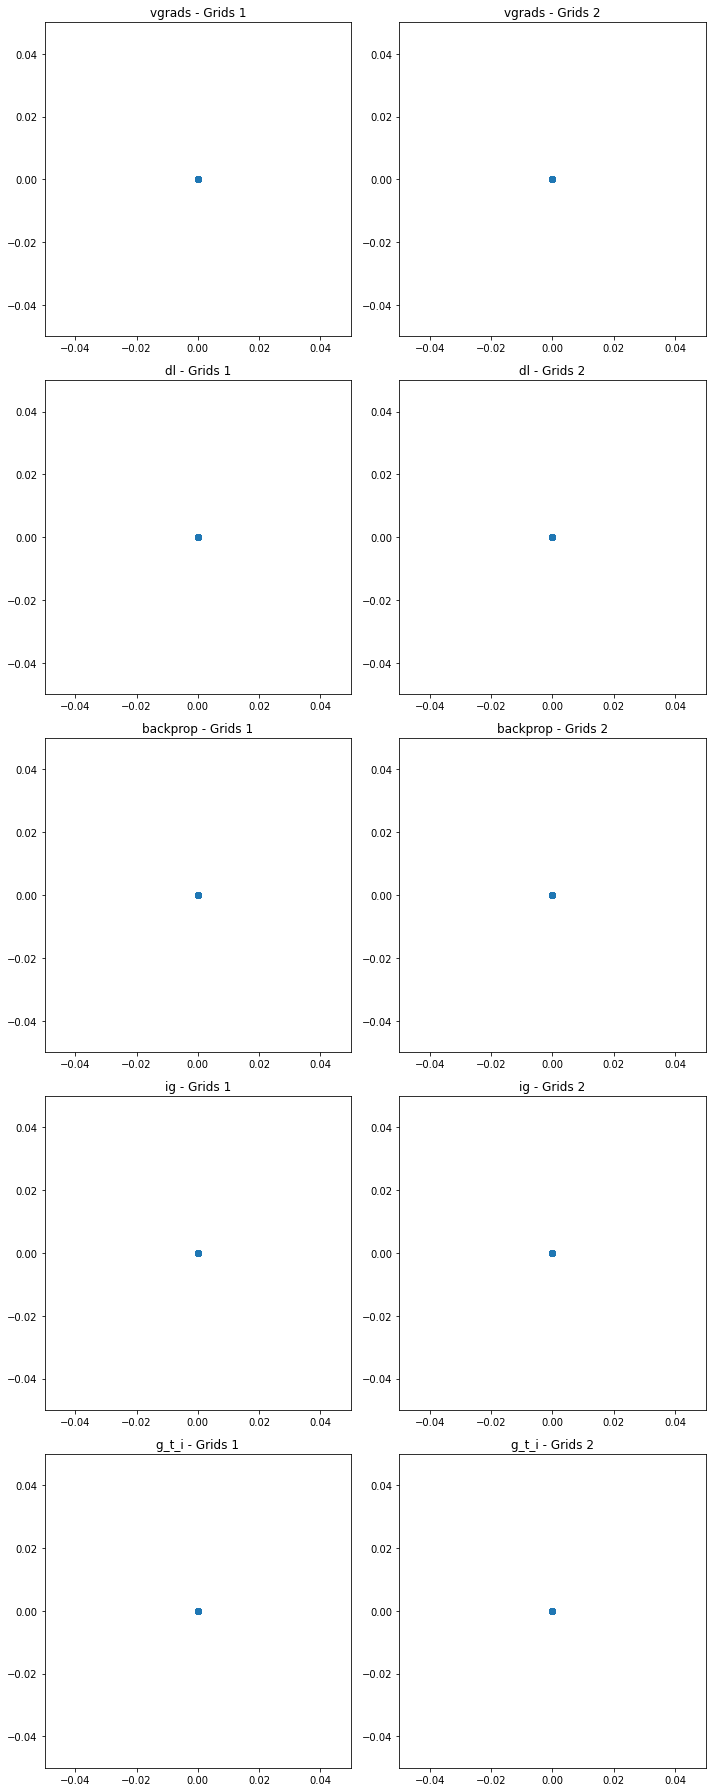

---------------------------------------------------------------------------


In [19]:
# Linear kernel
print("Plots for Linear Kernel")
plot_scatter(all_grids_1_kpca_linear, all_grids_2_kpca_linear)

print('-'*75)

# poly kernel
print("Plots for Poly Kernel")
plot_scatter(all_grids_1_kpca_poly, all_grids_2_kpca_poly)

print('-'*75)

# cosine kernel
print("Plots for Cosine Kernel")
plot_scatter(all_grids_1_kpca_cosine, all_grids_2_kpca_cosine)

print('-'*75)

# sigmoid kernel
print("Plots for Sigmoid Kernel")
plot_scatter(all_grids_1_kpca_sigmoid, all_grids_2_kpca_sigmoid)

print('-'*75)

# Sigmoid kernel plotting is sooooo off

In [21]:
# Gaussian kernel
all_grids_1_kpca_rbf = reduce_dimensionality_kpca(all_grids_1, n_components=2)
all_grids_2_kpca_rbf = reduce_dimensionality_kpca(all_grids_1, n_components=2)

# Gaussian kernel does not work (something to do with -ve eigenvalues; I think)

Reducing dimensionality for technique vgrads...
Failed to reduce dimensionality for technique vgrads: zero-size array to reduction operation maximum which has no identity
Reducing dimensionality for technique dl...
Failed to reduce dimensionality for technique dl: zero-size array to reduction operation maximum which has no identity
Reducing dimensionality for technique backprop...
Failed to reduce dimensionality for technique backprop: zero-size array to reduction operation maximum which has no identity
Reducing dimensionality for technique ig...
Failed to reduce dimensionality for technique ig: zero-size array to reduction operation maximum which has no identity
Reducing dimensionality for technique g_t_i...
Failed to reduce dimensionality for technique g_t_i: zero-size array to reduction operation maximum which has no identity
Reducing dimensionality for technique vgrads...
Failed to reduce dimensionality for technique vgrads: zero-size array to reduction operation maximum which has 

In [ ]:
# Distribution Plots (did not run due to frequent disconnects)
# Linear kernel
print("Plots for Linear Kernel")
plot_2d_distributions(all_grids_1_kpca_linear, all_grids_2_kpca_linear)

print('-'*75)

# poly kernel
print("Plots for Poly Kernel")
plot_2d_distributions(all_grids_1_kpca_poly, all_grids_2_kpca_poly)

print('-'*75)

# cosine kernel
print("Plots for Cosine Kernel")
plot_2d_distributions(all_grids_1_kpca_cosine, all_grids_2_kpca_cosine)

print('-'*75)


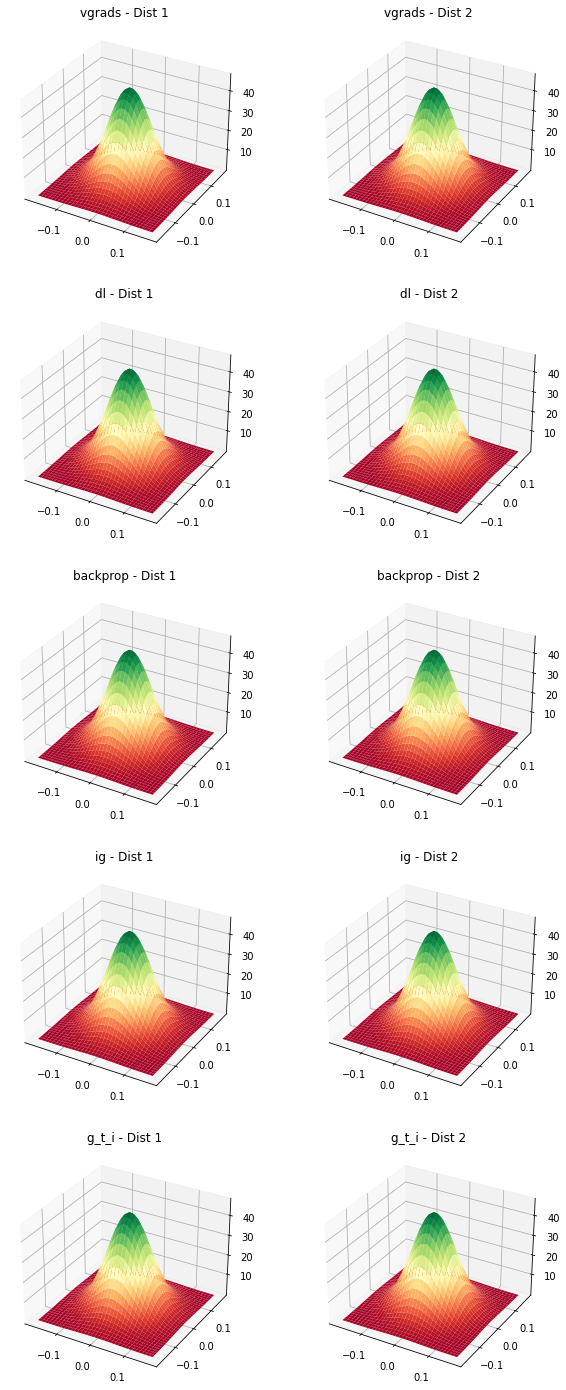

In [24]:
# This is for n_components=2, kernel=rbf (somehow never worked again; thought to leave it in)
plot_2d_distributions(all_grids_1_kpca, all_grids_2_kpca) 

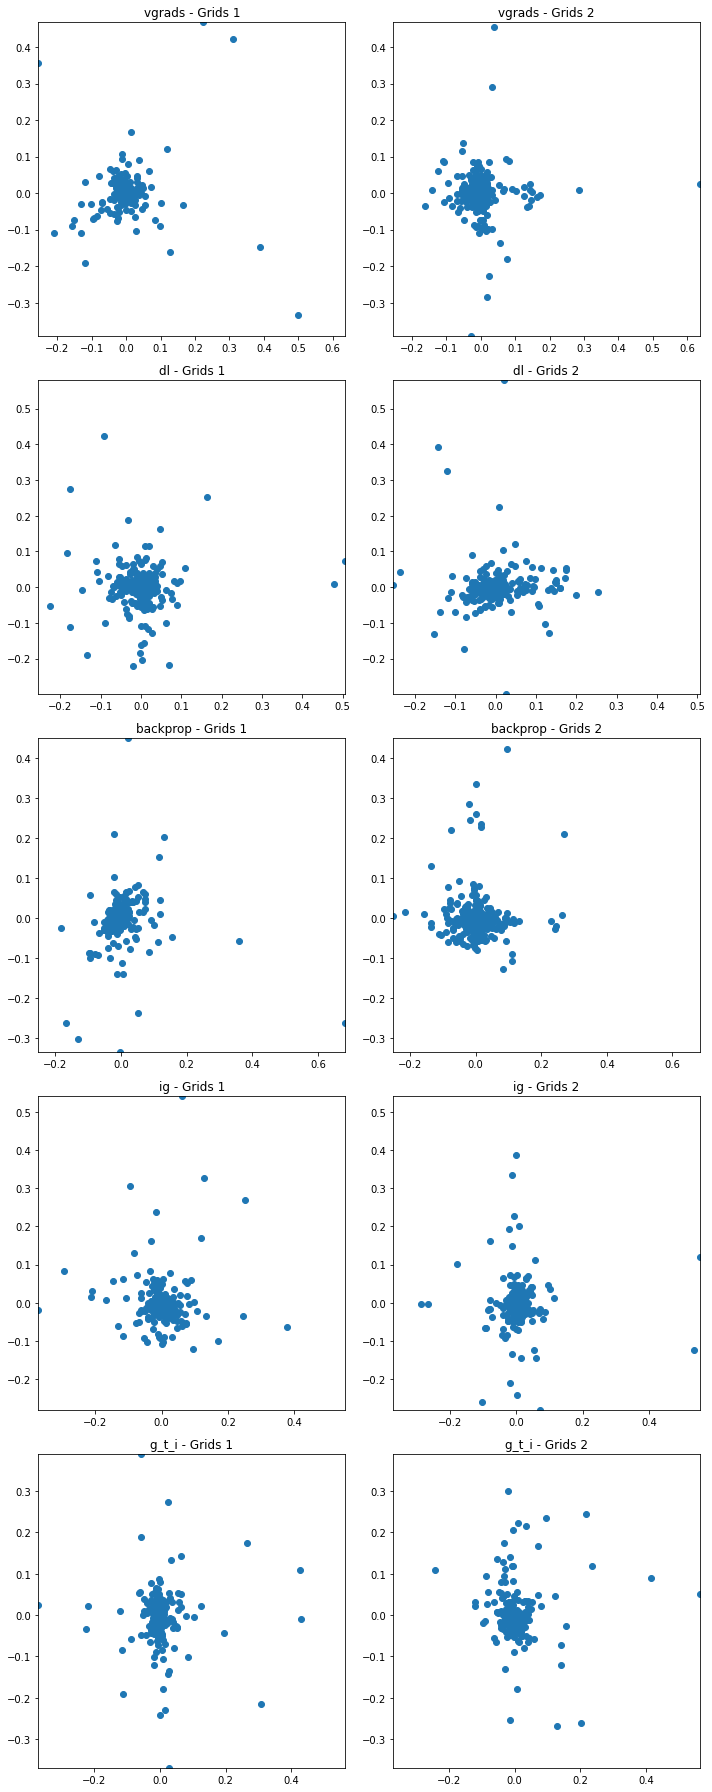

In [31]:
# This is for n_components=2, kernel=rbf (somehow never worked again; thought to leave it in)
plot_scatter(all_grids_1_kpca, all_grids_2_kpca)

In [28]:
print({key: all_grids_1_kpca[key] - all_grids_2_kpca[key] for key in all_grids_1_kpca})

{'vgrads': array([[ 2.28859072e-02, -2.36315939e-02],
       [ 1.53056911e-02, -3.83611657e-02],
       [ 3.59691747e-03, -1.49391451e-02],
       [ 1.36091594e-01,  6.92550463e-02],
       [ 4.64603716e-02, -8.81665089e-03],
       [-5.81034526e-02,  1.08815632e-01],
       [-1.12095644e-03, -2.13893847e-02],
       [ 4.25253070e-02,  1.41277519e-02],
       [ 4.21541297e-02,  6.47904771e-02],
       [-8.79647020e-02, -7.77142706e-02],
       [-1.52596497e-01, -1.15850076e-01],
       [ 6.34865789e-03, -1.30691557e-02],
       [-4.98447581e-02, -3.55192909e-02],
       [ 1.32977285e-02, -7.05214798e-03],
       [ 1.04921476e-01, -1.12167656e-01],
       [-1.62036865e-01,  1.24544844e-02],
       [ 2.94349996e-02,  3.83138144e-02],
       [-3.85692748e-02, -9.56456321e-02],
       [-1.02851331e-01,  5.60476113e-03],
       [ 4.34501644e-02,  1.09204438e-01],
       [-6.50662733e-01, -5.69269613e-02],
       [ 1.17211101e-01,  1.37591187e-01],
       [ 8.00907056e-02, -3.00167010e-02],


# Calculate the metrics on a per-Image basis, store the distances, compute the distributions for the difference arrays

In [5]:
MODEL_TYPE = "cnn"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams"
MAX_IMAGES = 500

In [6]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)
all_grids_3 = load_all_grids_randparams(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out of 500 (60.00%)
Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out of 500 (60.00%)
Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out of 500 (60.00%)
Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out 

In [8]:
distances1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)

In [9]:
difference = difference_distances(
    reference=distances1, 
    delta=distances2, 
    fold_change_and_log_scale=True
)

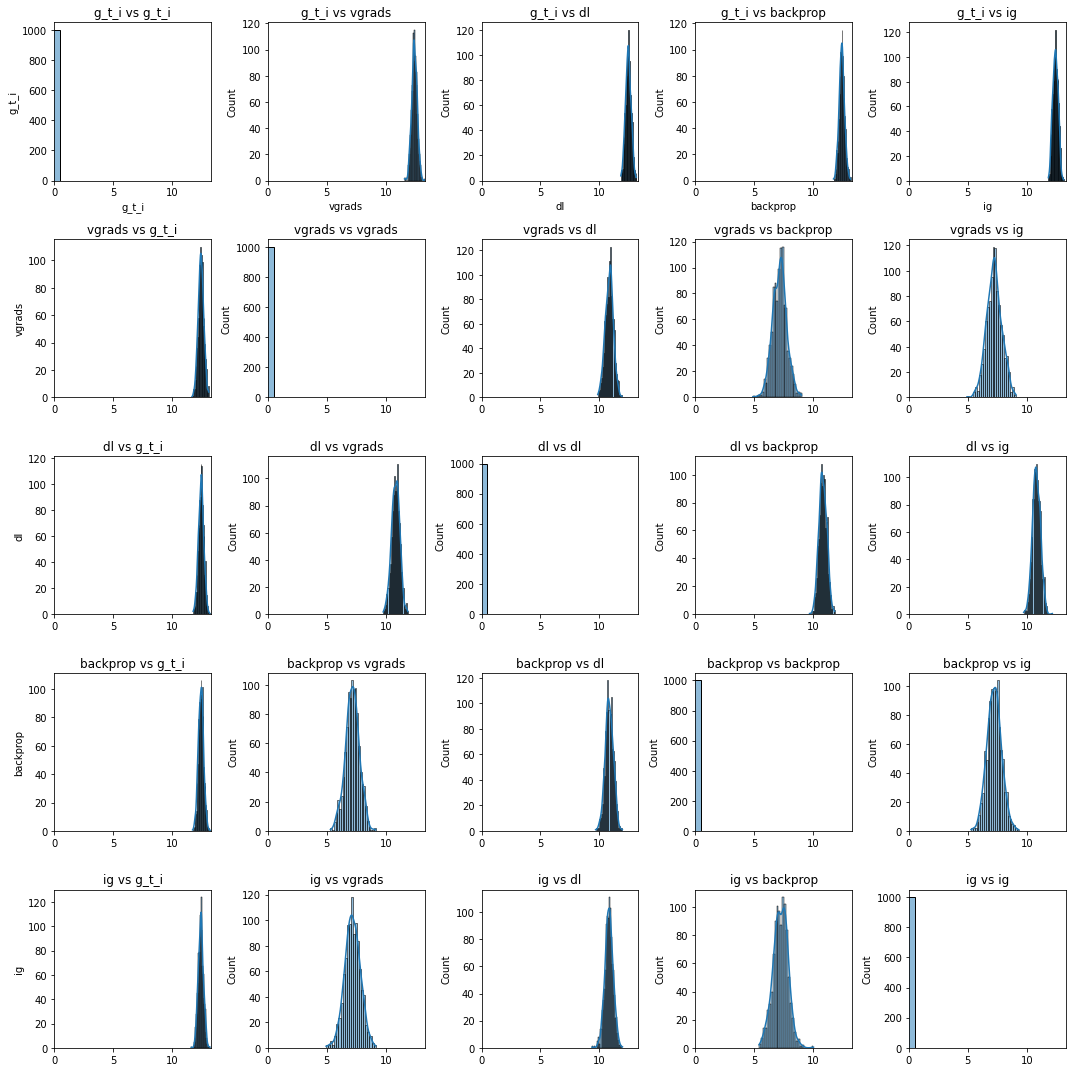

In [10]:
# Plot the Non-Attacked Version (log Scale)
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances1), 
    techniques=list(techniques), 
    metric='euclidean'
)

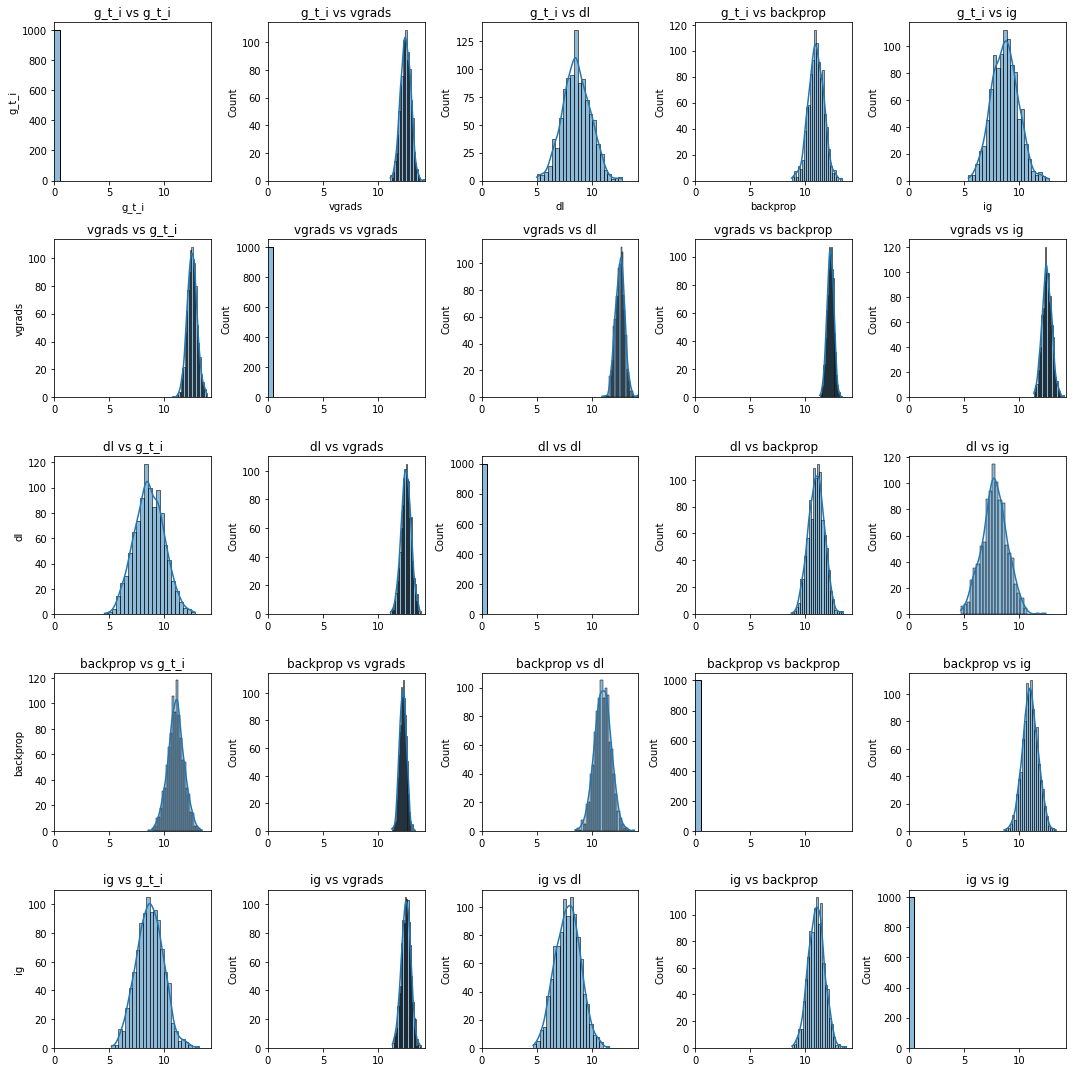

In [11]:
# Plot the Attacked Version (log Scale)
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances2), 
    techniques=list(techniques), 
    metric='euclidean'
)

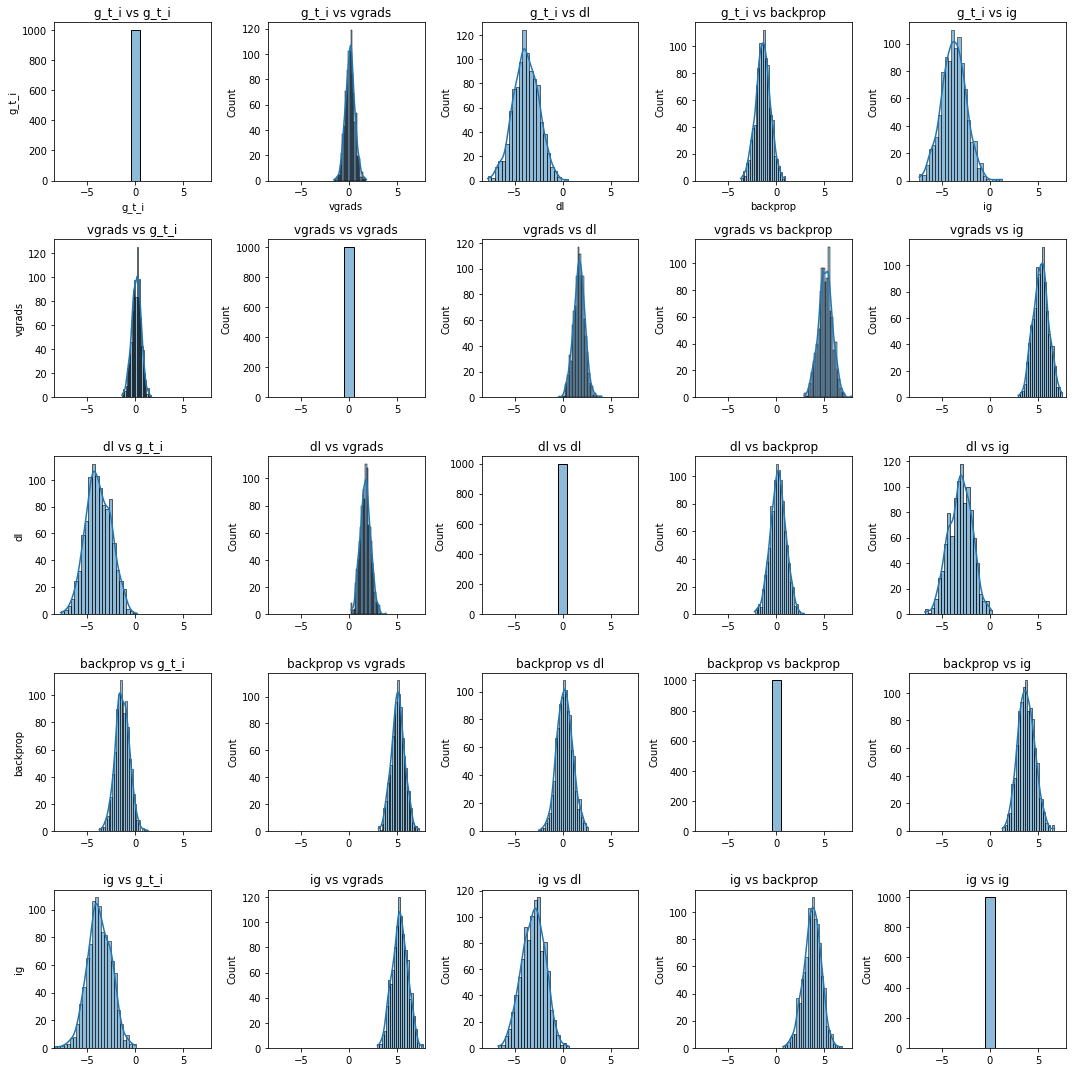

In [12]:
plot_gaussian_distributions(
    grids=difference, 
    techniques=list(techniques), 
    metric='euclidean'
)

# Reduce (CNN, MNIST) using Dim. Reduction, compare Gaussian Distributions and Plot

In [26]:
MODEL_TYPE = "cnn"
DATASET = "mnist"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams"
MAX_IMAGES = 100

In [27]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)
all_grids_3 = load_all_grids_randparams(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading i

## UMap

In [24]:
all_grids_1_umap = reduce_dimensionality_umap(all_grids_1, 2)
all_grids_2_umap = reduce_dimensionality_umap(all_grids_2, 2)

# nothing wrong with this; accidentally ran it again so I interrupted it

Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...


KeyboardInterrupt: 

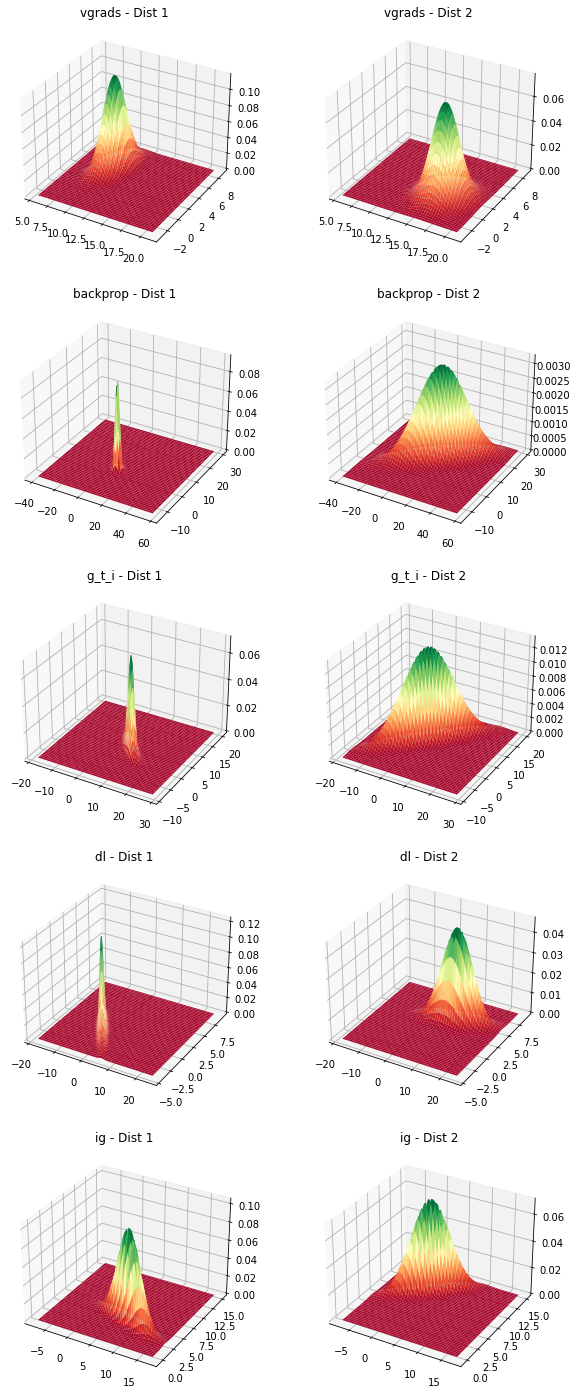

In [5]:
plot_2d_distributions(all_grids_1_umap, all_grids_2_umap)

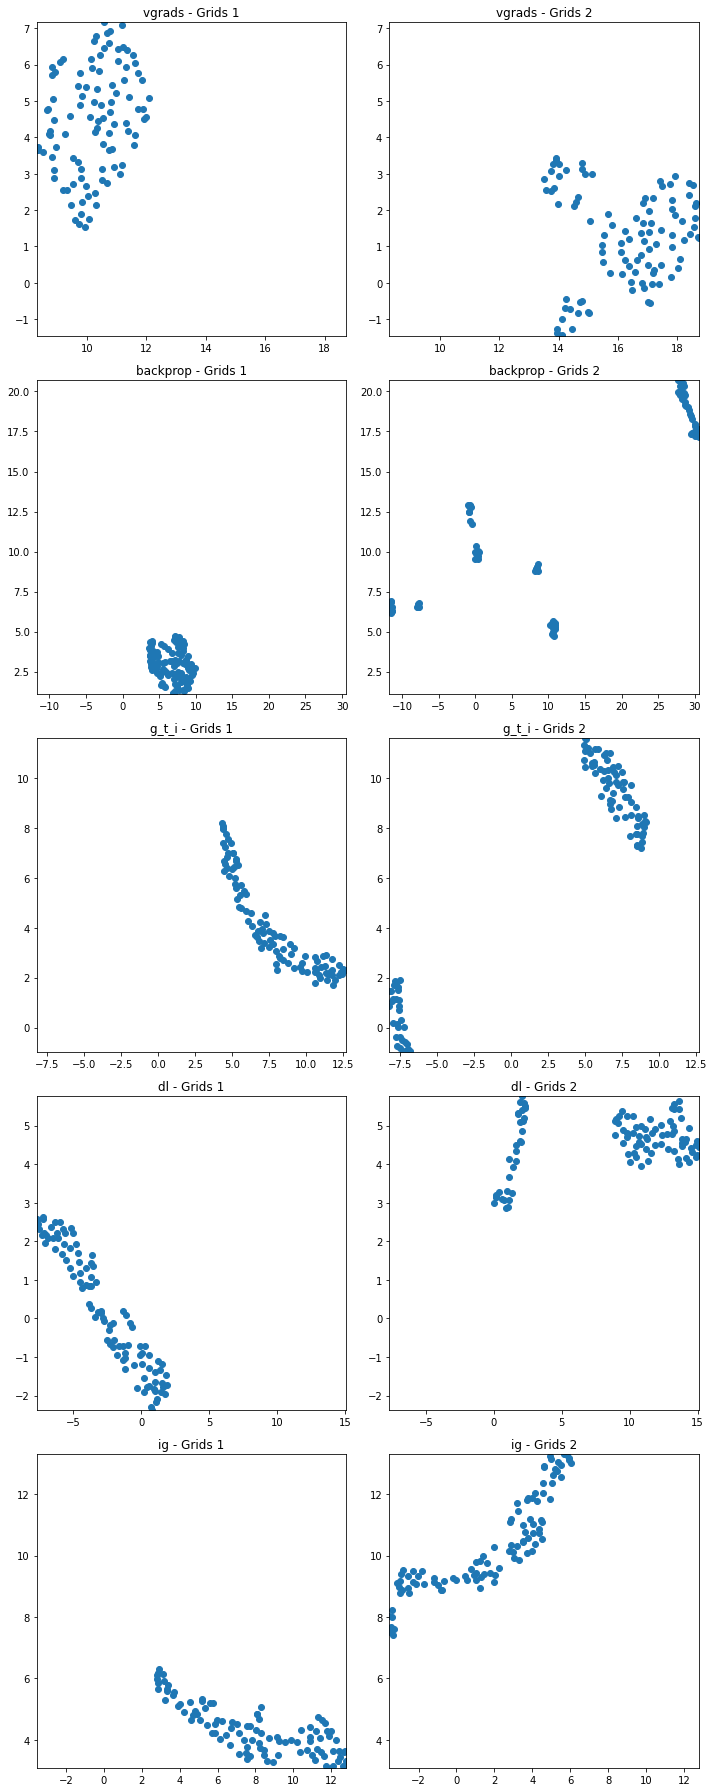

In [6]:
plot_scatter(all_grids_1_umap, all_grids_2_umap)

## tSNE 

In [17]:
all_grids_1_tsne =reduce_dimensionality_tsne(all_grids_1, 2)
all_grids_2_tsne =reduce_dimensionality_tsne(all_grids_2, 2)

Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...


In [ ]:
plot_2d_distributions(all_grids_1_tsne, all_grids_2_tsne)

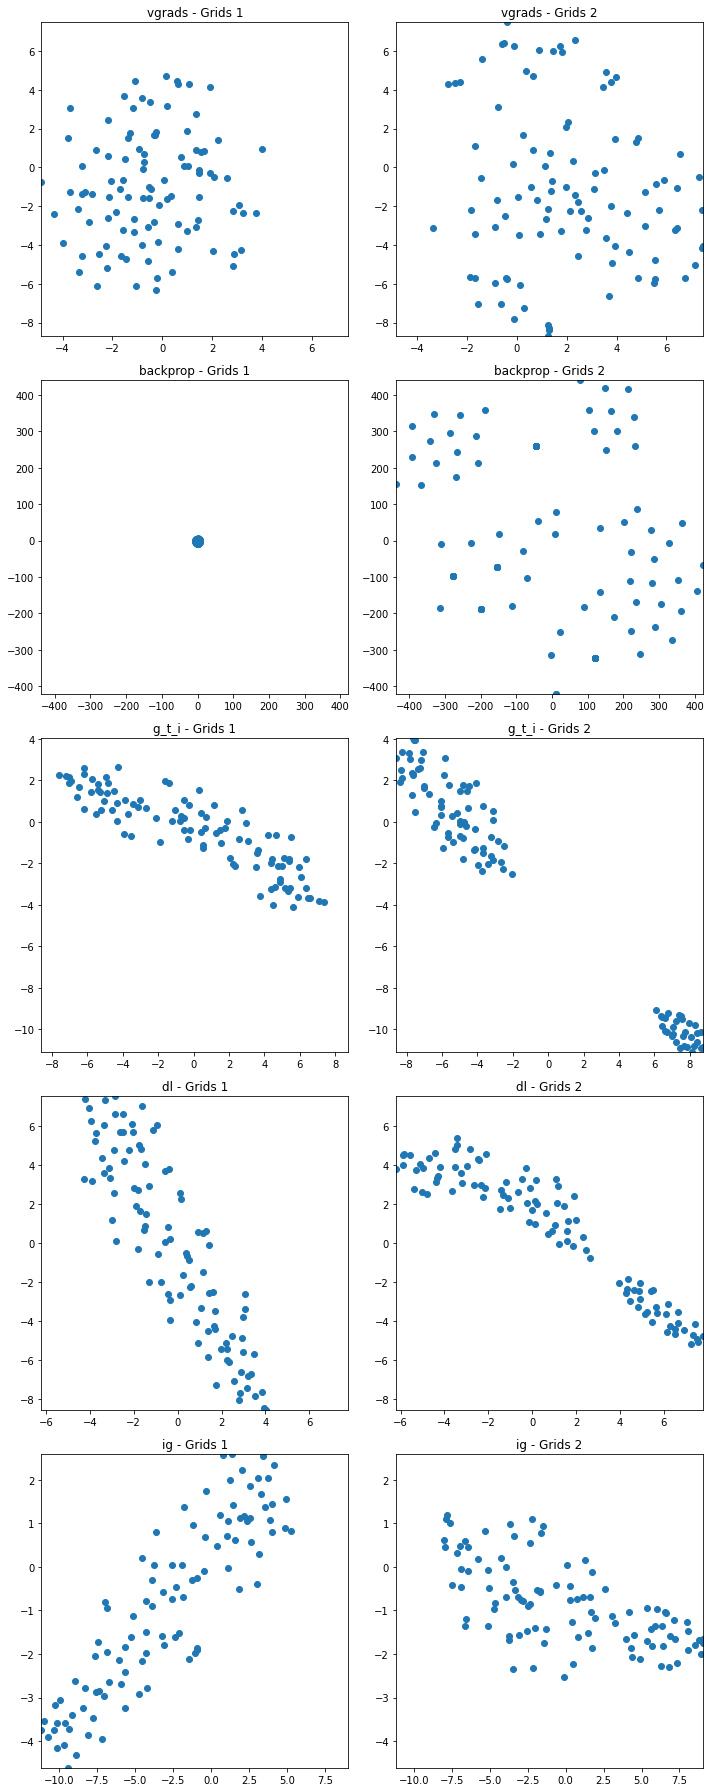

In [20]:
plot_scatter(all_grids_1_tsne, all_grids_2_tsne)

# Backprop grids 1 sus

## kPCA

In [28]:
# Linear kernel
all_grids_1_kpca_linear = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='linear')
all_grids_2_kpca_linear = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='linear')

# Poly kernel
all_grids_1_kpca_poly = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='poly')
all_grids_2_kpca_poly = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='poly')

# Sigmoid kernel
all_grids_1_kpca_sigmoid = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='sigmoid')
all_grids_2_kpca_sigmoid = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='sigmoid')

# Cosine kernel
all_grids_1_kpca_cosine = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='cosine')
all_grids_2_kpca_cosine = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='cosine')


Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique vgrads...
Reducing dimensional

Plots for Linear Kernel


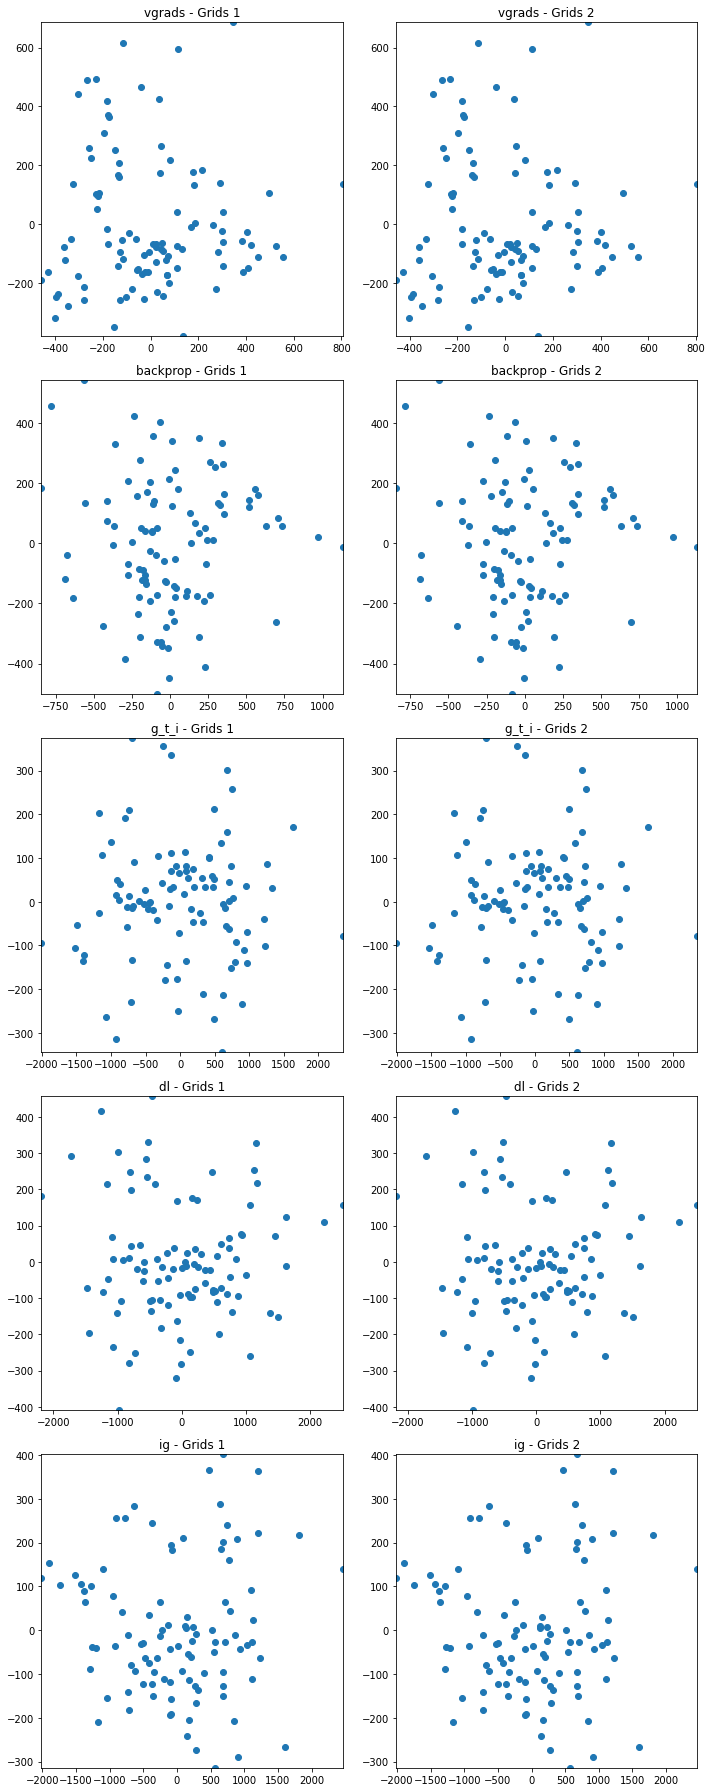

---------------------------------------------------------------------------
Plots for Poly Kernel


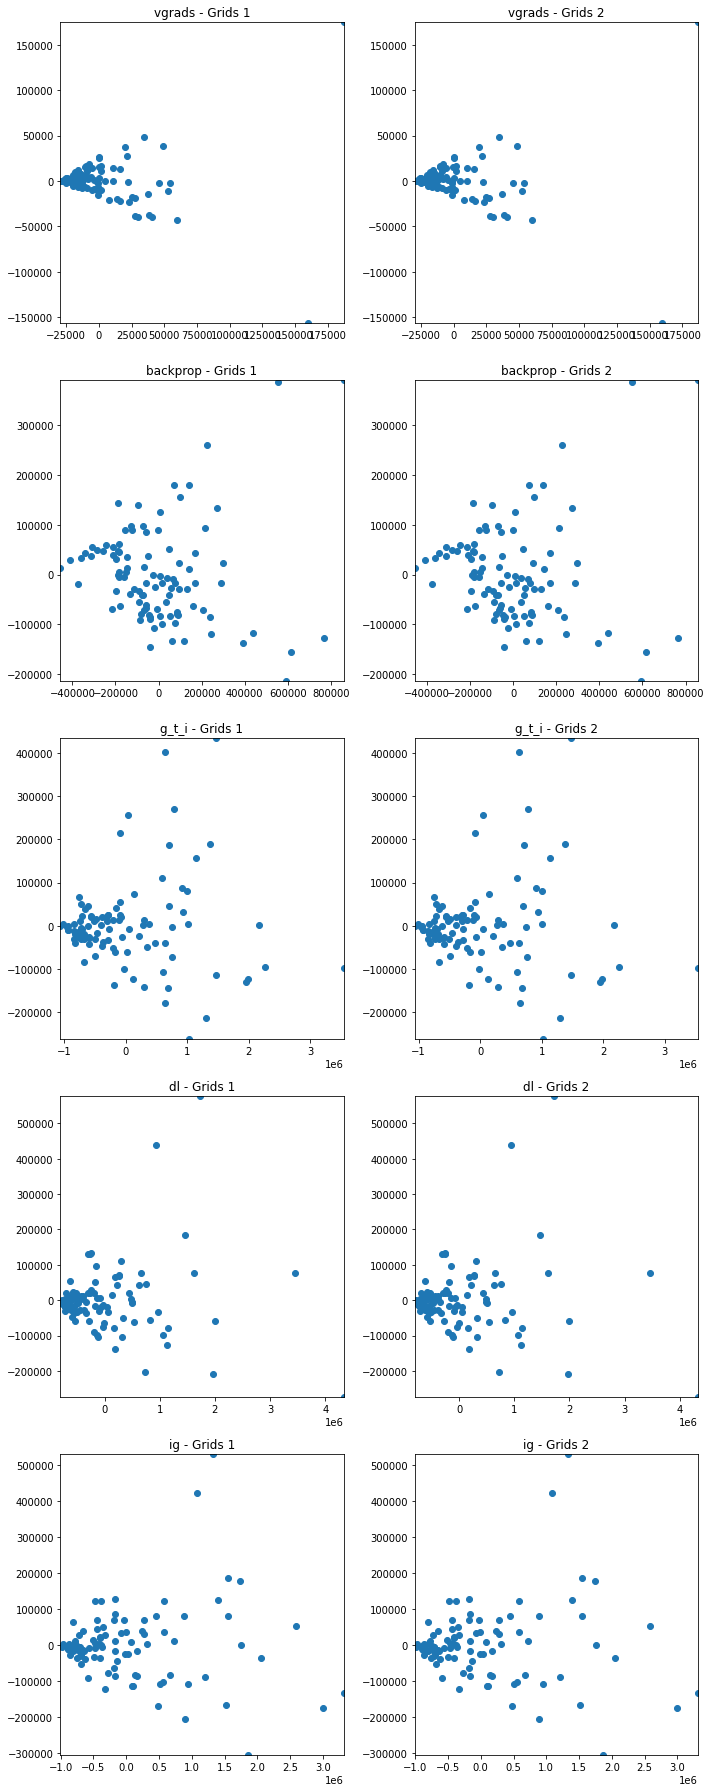

---------------------------------------------------------------------------
Plots for Cosine Kernel


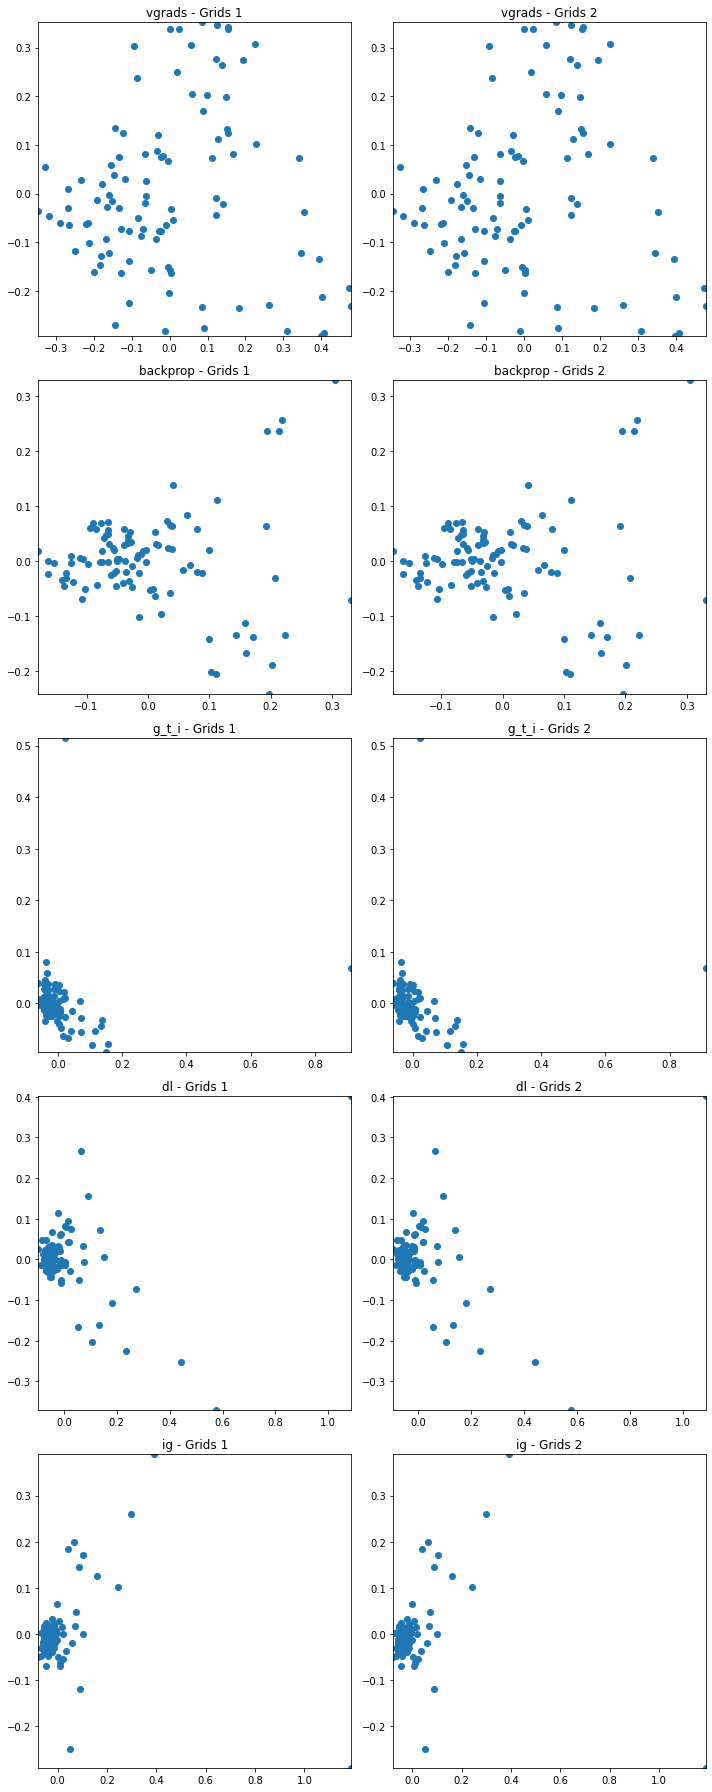

---------------------------------------------------------------------------
Plots for Sigmoid Kernel


/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:302: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i, 0].set_xlim([x_min, x_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:303: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i, 0].set_ylim([y_min, y_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:307: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i, 1].set_xlim([x_min, x_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:308: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i, 1].set_ylim([y_min, y_max])


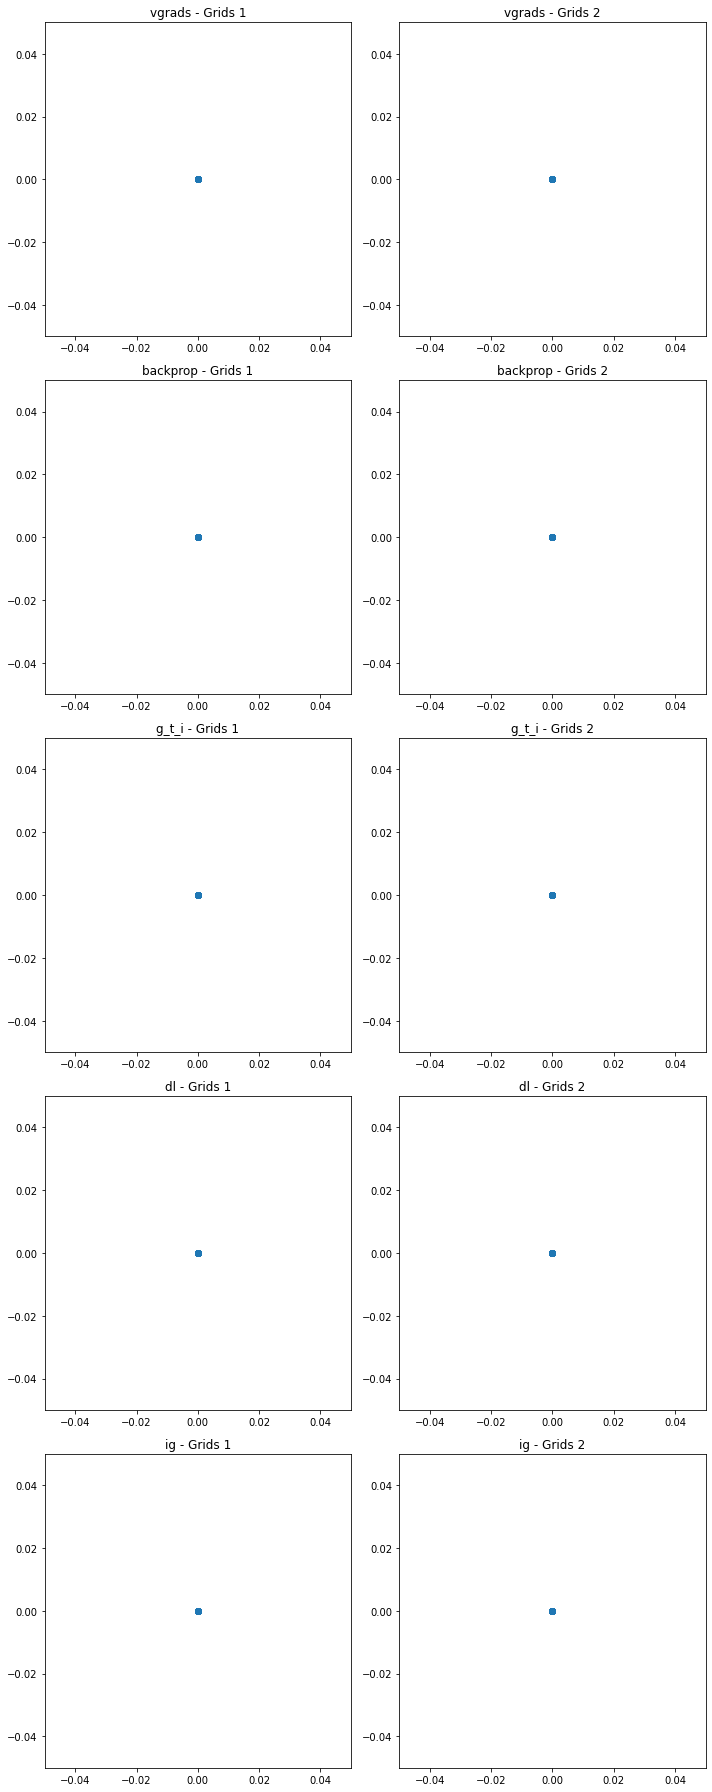

---------------------------------------------------------------------------


In [29]:
# Linear kernel
print("Plots for Linear Kernel")
plot_scatter(all_grids_1_kpca_linear, all_grids_2_kpca_linear)

print('-'*75)

# poly kernel
print("Plots for Poly Kernel")
plot_scatter(all_grids_1_kpca_poly, all_grids_2_kpca_poly)

print('-'*75)

# cosine kernel
print("Plots for Cosine Kernel")
plot_scatter(all_grids_1_kpca_cosine, all_grids_2_kpca_cosine)

print('-'*75)

# sigmoid kernel
print("Plots for Sigmoid Kernel")
plot_scatter(all_grids_1_kpca_sigmoid, all_grids_2_kpca_sigmoid)

print('-'*75)

# Sigmoid kernel plotting is sooooo off again

In [30]:
# Distribution Plots (did not run due to frequent disconnects)
# Linear kernel
print("Plots for Linear Kernel")
plot_2d_distributions(all_grids_1_kpca_linear, all_grids_2_kpca_linear)

print('-'*75)

# poly kernel
print("Plots for Poly Kernel")
plot_2d_distributions(all_grids_1_kpca_poly, all_grids_2_kpca_poly)

print('-'*75)

# cosine kernel
print("Plots for Cosine Kernel")
plot_2d_distributions(all_grids_1_kpca_cosine, all_grids_2_kpca_cosine)

print('-'*75)


Plots for Linear Kernel


KeyboardInterrupt: 

<Figure size 720x1800 with 0 Axes>

# Calculate the metrics on a per-Image basis, store the distances, compute the distributions for the difference arrays

In [38]:
MODEL_TYPE = "cnn"
DATASET = "mnist"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams"
MAX_IMAGES = 500

In [39]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)
all_grids_3 = load_all_grids_randparams(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out of 500 (60.00%)
Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out of 500 (60.00%)
Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out of 500 (60.00%)
Loading grids from disk...
Loading image 50 out of 500 (10.00%)
Loading image 100 out of 500 (20.00%)
Loading image 150 out of 500 (30.00%)
Loading image 200 out of 500 (40.00%)
Loading image 250 out of 500 (50.00%)
Loading image 300 out 

In [40]:
distances1, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_1, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)
distances2, techniques, distance_functions = test_all_introspection_technique_combinations(
    grids=all_grids_2, 
    print_results=False, 
    average_results=False,
    use_ssim=False
)

In [41]:
difference = difference_distances(
    reference=distances1, 
    delta=distances2, 
    fold_change_and_log_scale=True
)

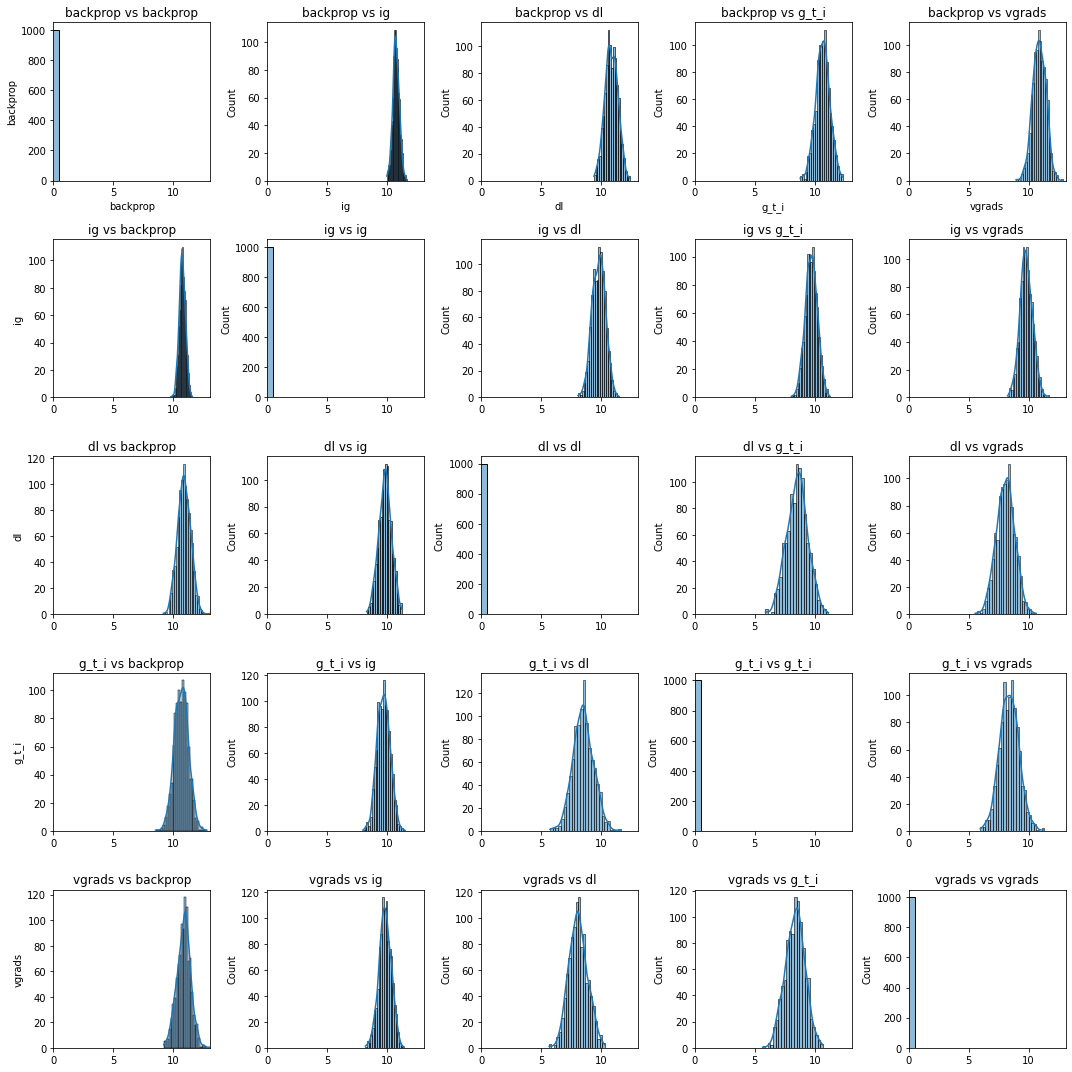

In [42]:
# Plot the Non-Attacked Version (log Scale)
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances1), 
    techniques=list(techniques), 
    metric='euclidean'
)

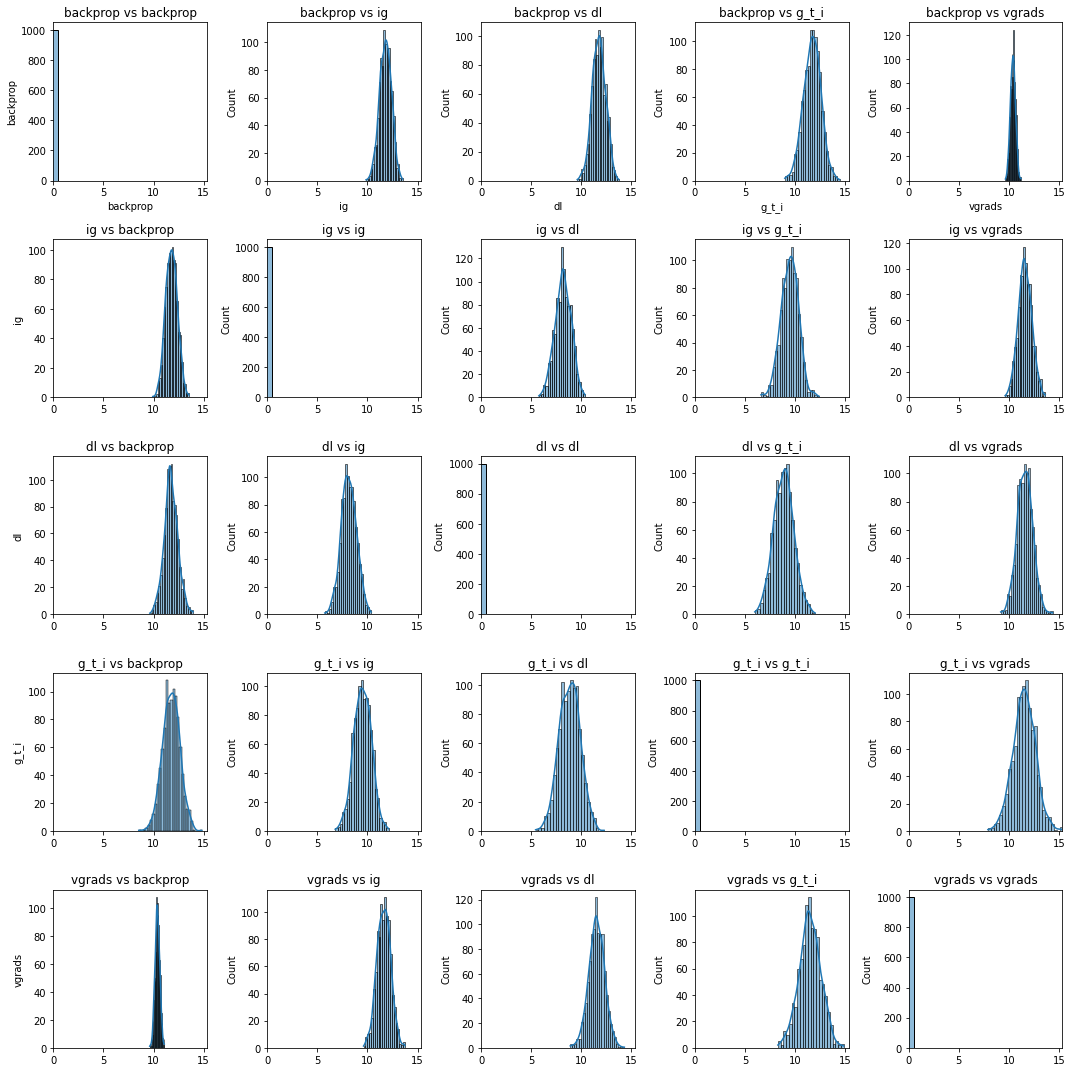

In [43]:
# Plot the Attacked Version (log Scale)
plot_gaussian_distributions(
    distances=apply_log_to_distances(distances2), 
    techniques=list(techniques), 
    metric='euclidean'
)

# Compare High-dim and Dim-reduced Heatmaps (MNIST, CNN)

In [23]:
# Did not run for kPCA as the results looked inconclusive

distances_cnn_mnist_org, introspection_techniques, distance_functions = test_all_introspection_technique_combinations(all_grids_1, print_results=False)
distances_cnn_mnist_umap, _, _ = test_all_introspection_technique_combinations(all_grids_1_umap, print_results=False)
distances_cnn_mnist_tsne, _, _ = test_all_introspection_technique_combinations(all_grids_1_tsne, print_results=False)

NameError: name 'all_grids_1_tsne' is not defined

In [36]:
distances_cnn_mnist_kpca_linear, introspection_techniques, distance_functions = test_all_introspection_technique_combinations(all_grids_1_kpca_linear, print_results=False)
distances_cnn_mnist_kpca_linear2, _, _ = test_all_introspection_technique_combinations(all_grids_2_kpca_linear, print_results=False)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


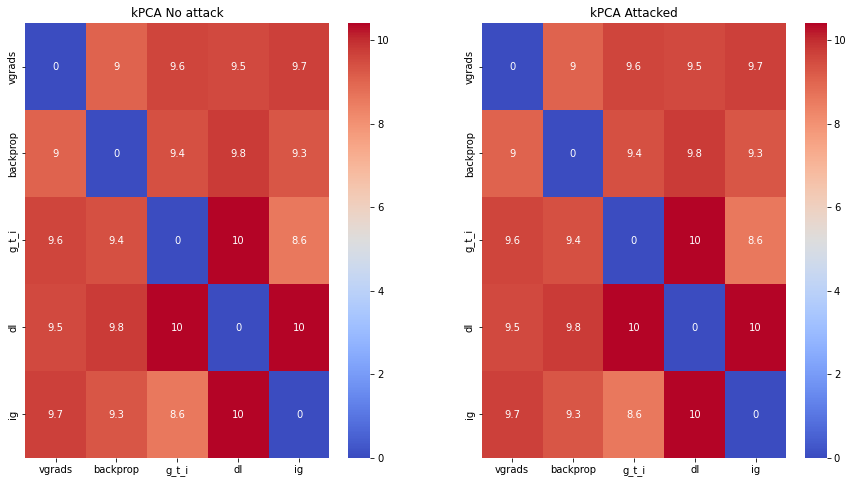

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


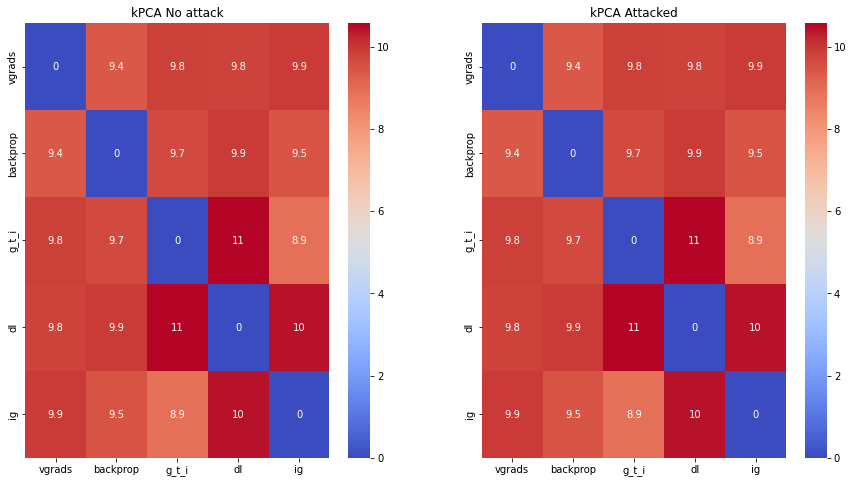

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


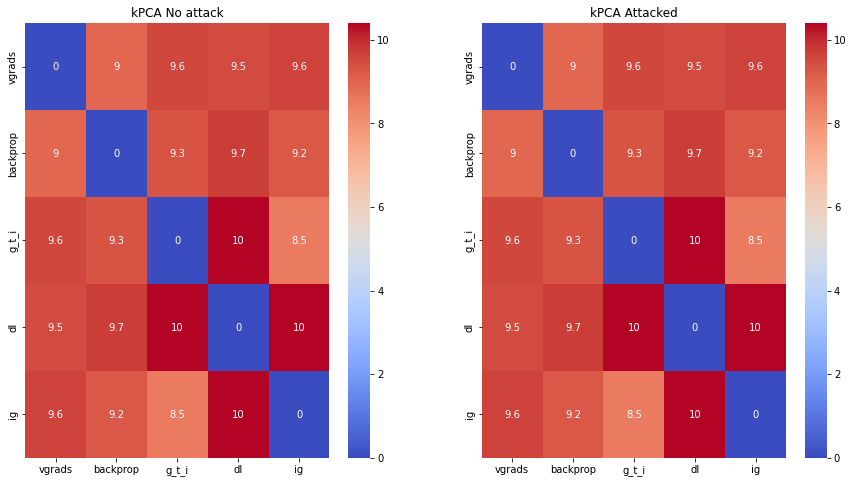

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


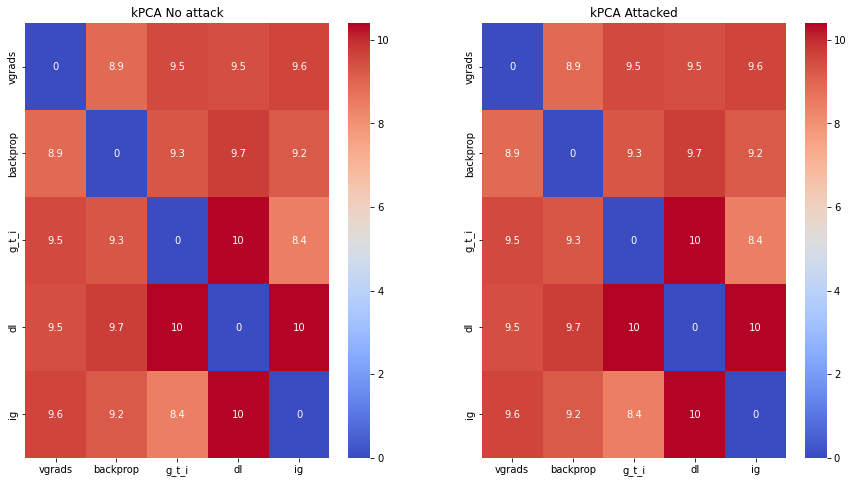

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


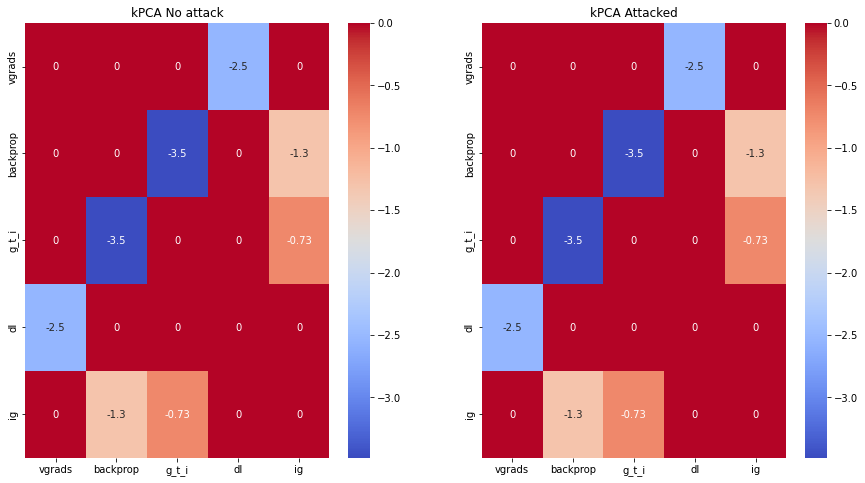

----------------------------------------------------------------------------------------------------


In [37]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_mnist_kpca_linear), 
    distances2=apply_log_to_distances(distances_cnn_mnist_kpca_linear2), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="Unattacked kPCA",
    title_distances2="RandLabels kPCA"
)

# Heatmaps show the same values for attacked and non attacked

In [19]:
distances_cnn_mnist_org2, introspection_techniques, distance_functions = test_all_introspection_technique_combinations(all_grids_2, print_results=False)
distances_cnn_mnist_umap2, _, _ = test_all_introspection_technique_combinations(all_grids_2_umap, print_results=False)
distances_cnn_mnist_tsne2, _, _ = test_all_introspection_technique_combinations(all_grids_2_tsne, print_results=False)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


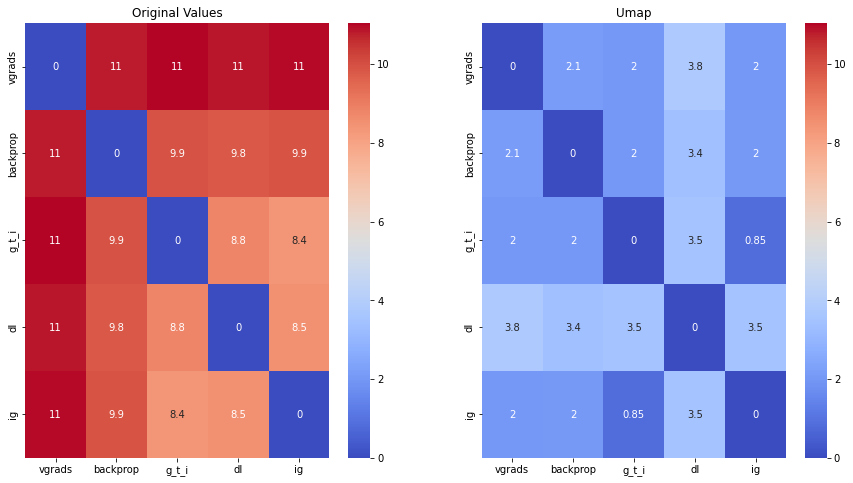

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


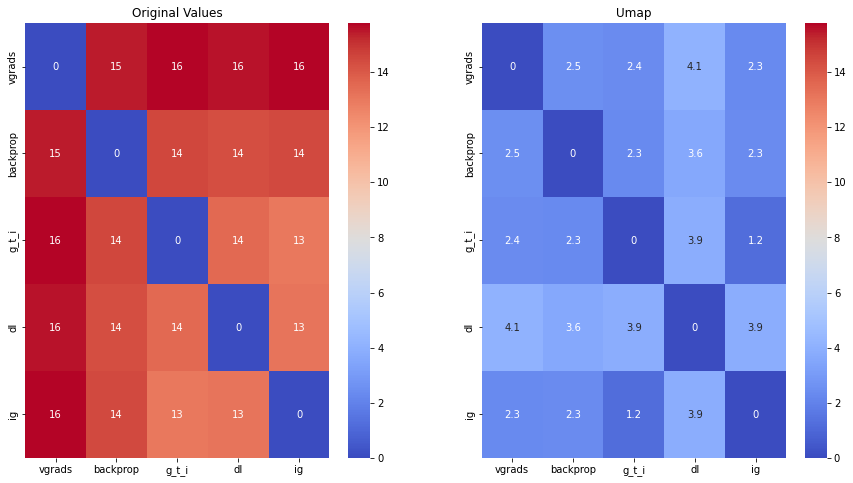

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


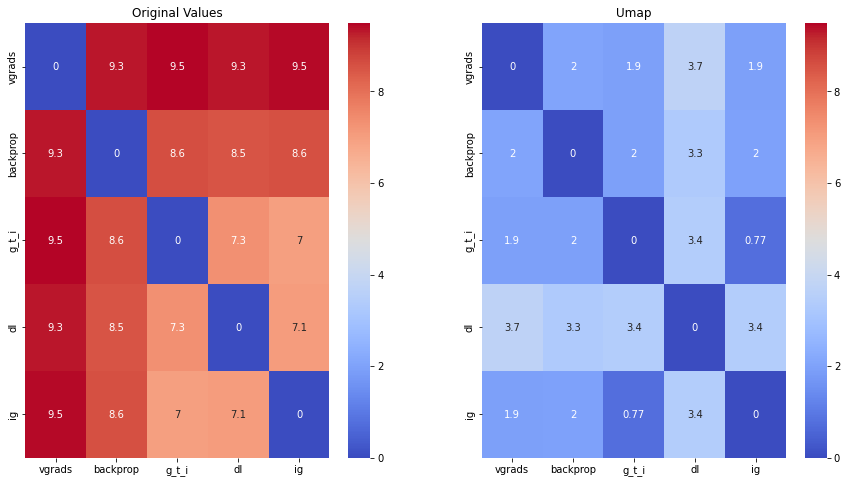

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


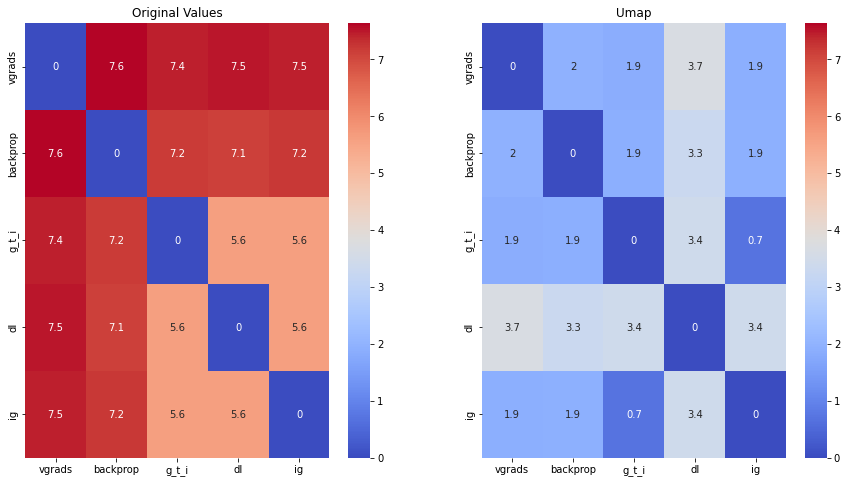

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


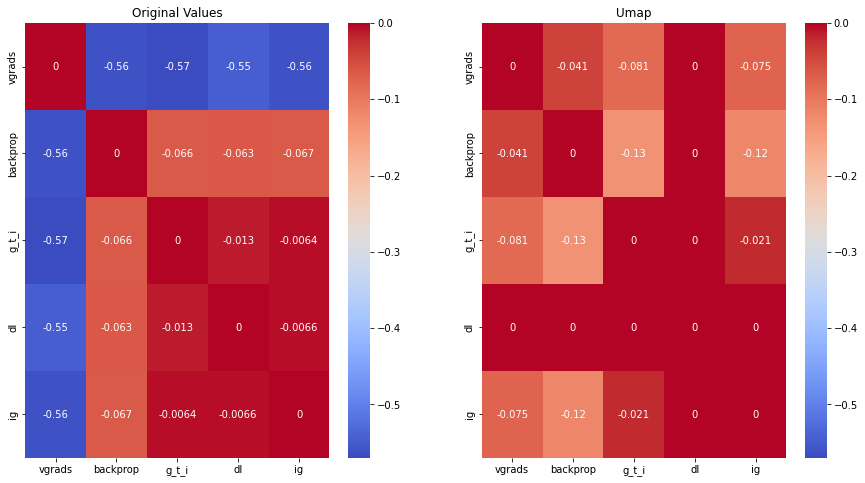

----------------------------------------------------------------------------------------------------


In [10]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_mnist_org), 
    distances2=apply_log_to_distances(distances_cnn_mnist_umap), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="Unattacked Original Values",
    title_distances2="Unattacked Umap"
)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


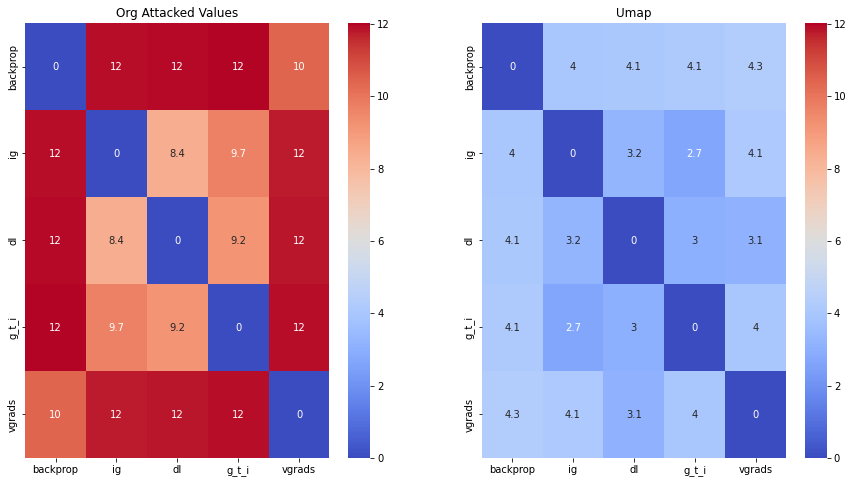

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


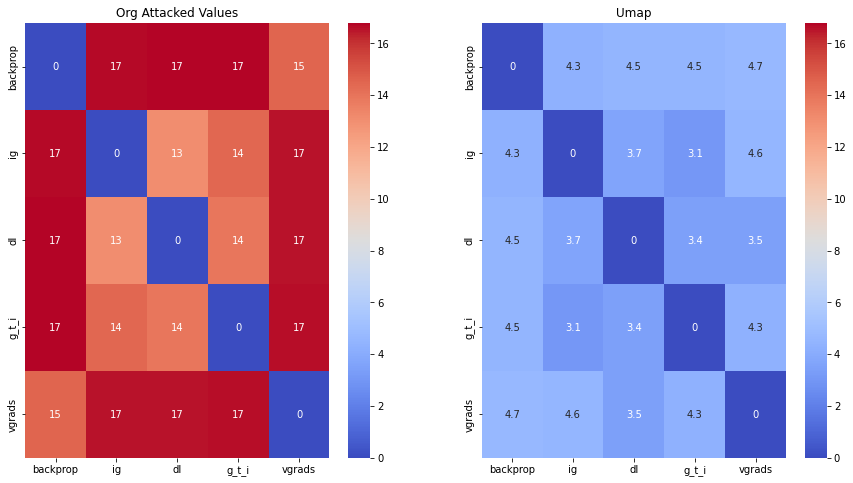

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


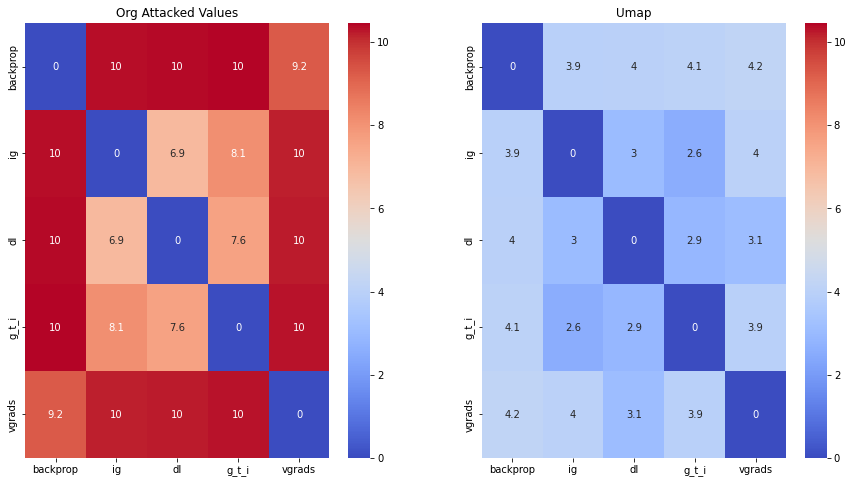

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


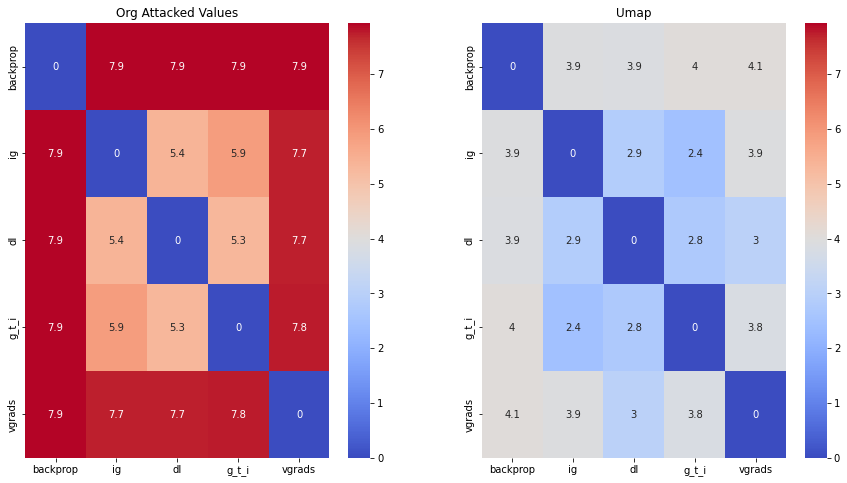

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


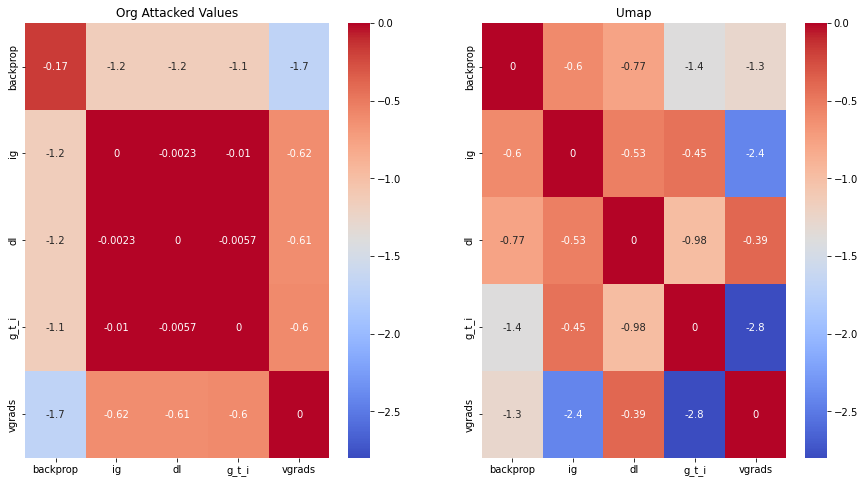

----------------------------------------------------------------------------------------------------


In [12]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_mnist_org2), 
    distances2=apply_log_to_distances(distances_cnn_mnist_umap2), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="RandLabels Original Values",
    title_distances2="RandLabels UMap"
)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


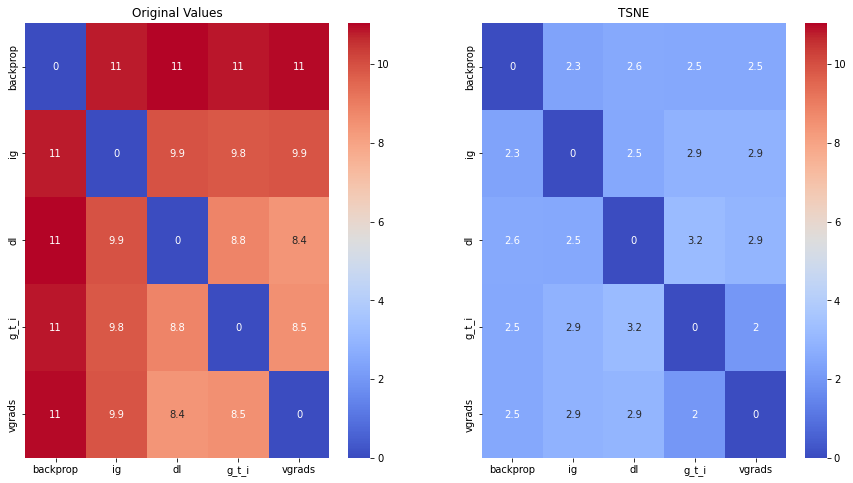

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


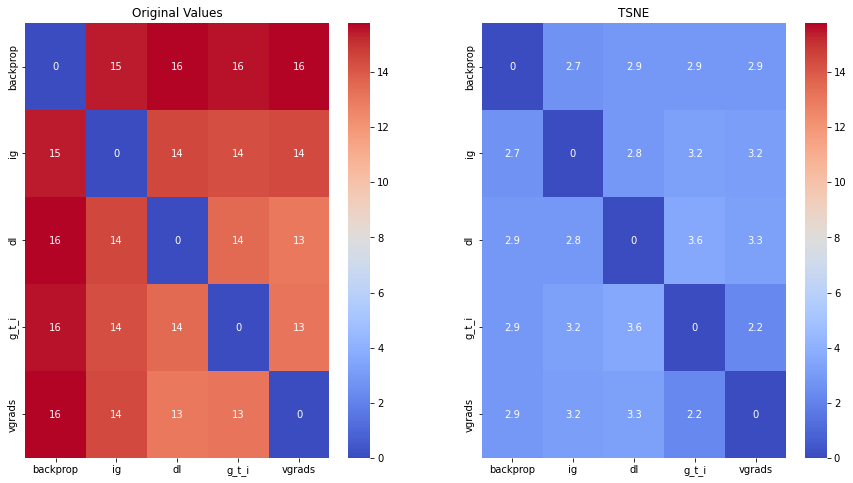

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


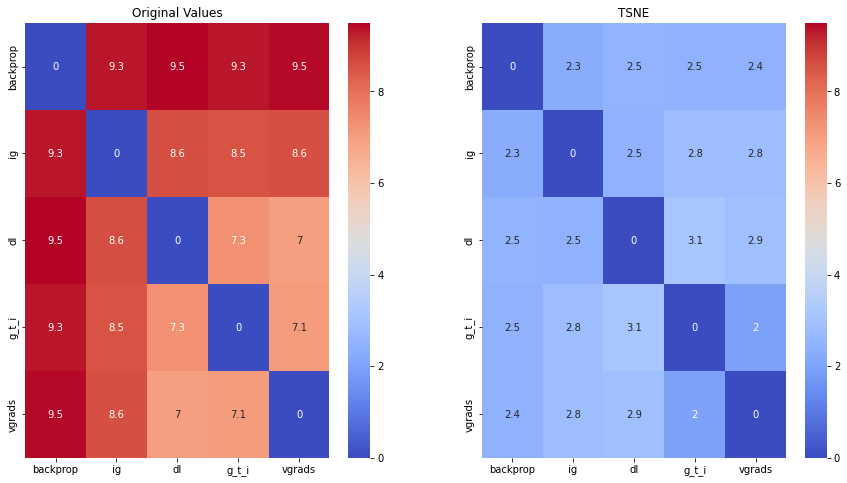

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


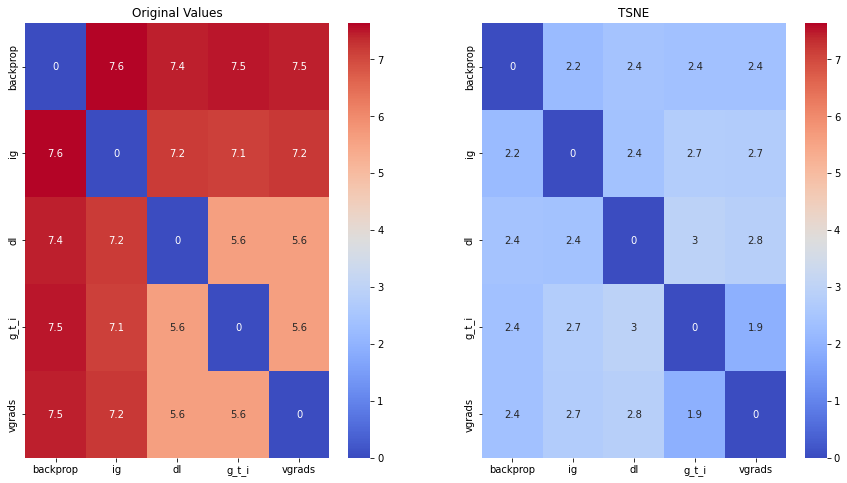

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


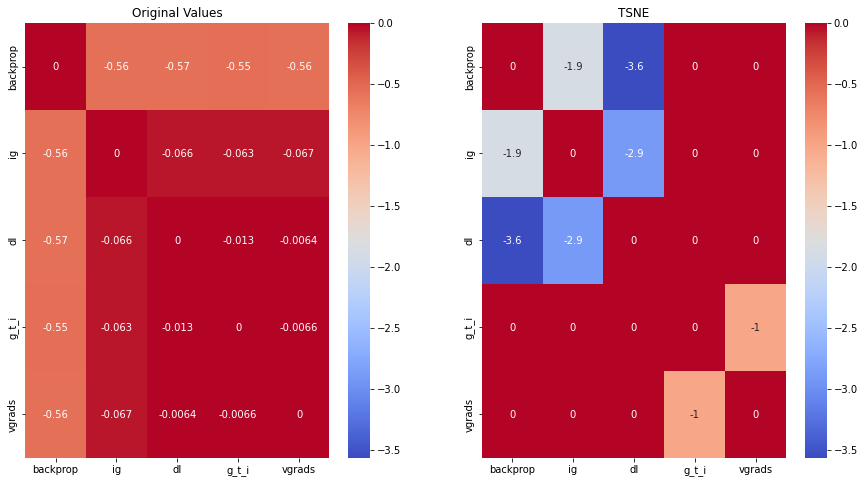

----------------------------------------------------------------------------------------------------


In [12]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_mnist_org), 
    distances2=apply_log_to_distances(distances_cnn_mnist_tsne), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="Unattacked Original Values",
    title_distances2="Unattacked TSNE"
)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


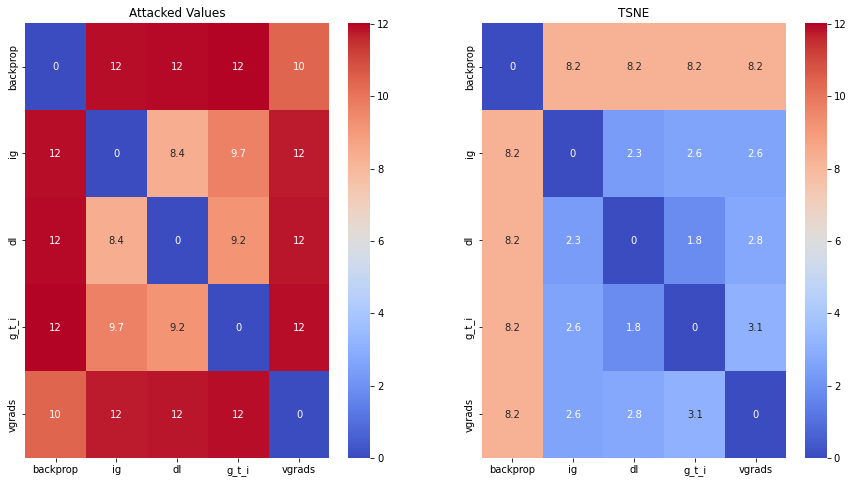

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


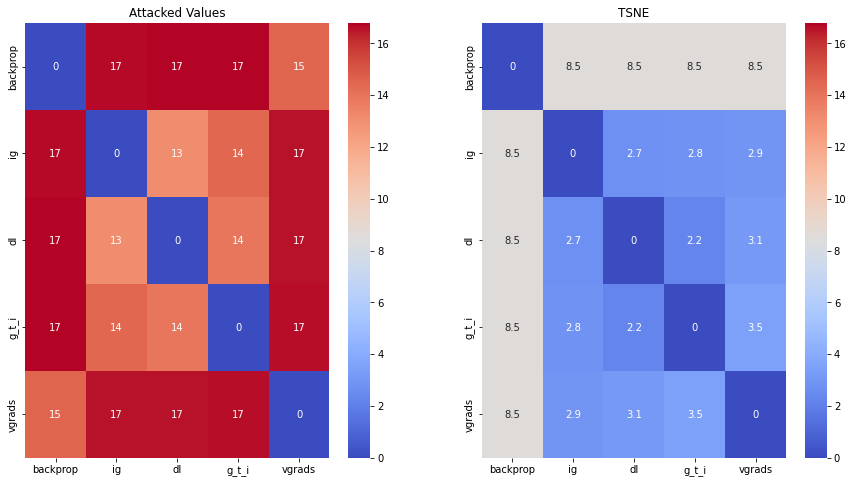

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


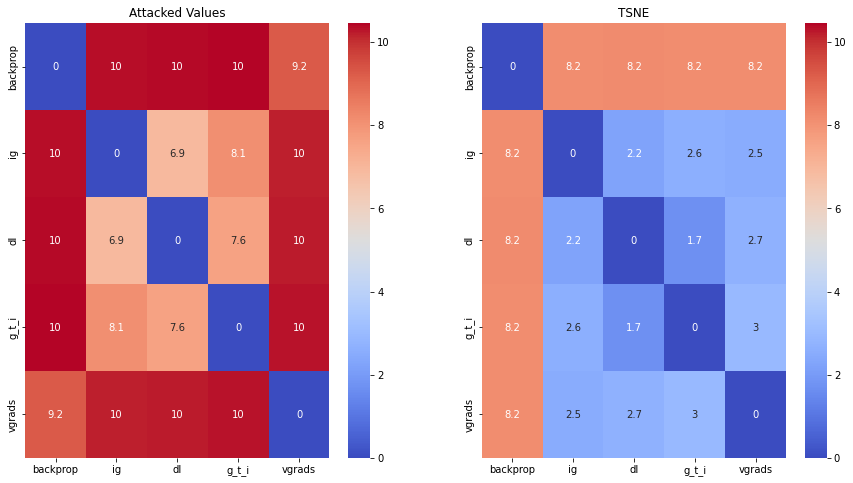

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


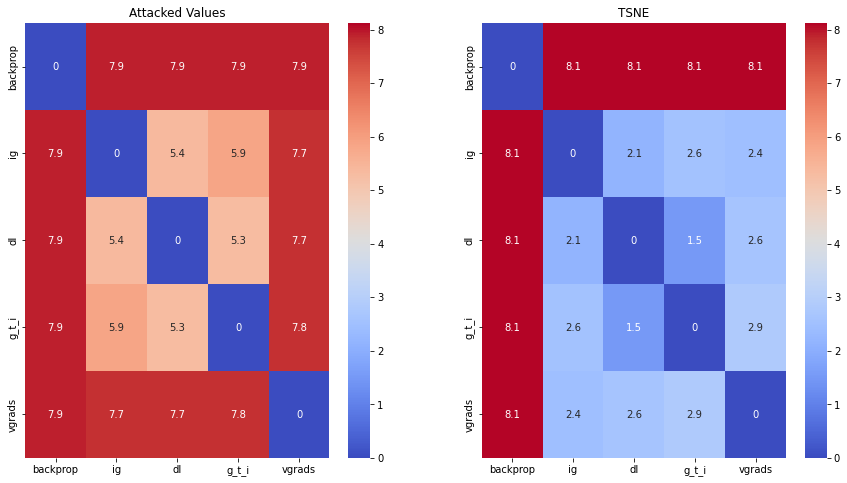

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


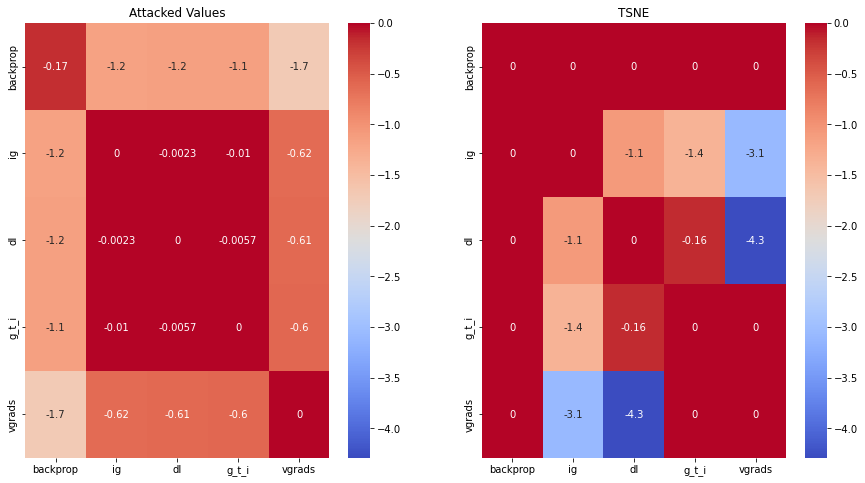

----------------------------------------------------------------------------------------------------


In [13]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_mnist_org2), 
    distances2=apply_log_to_distances(distances_cnn_mnist_tsne2), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="RandLabels Original Values",
    title_distances2="RandLabens TSNE"
)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


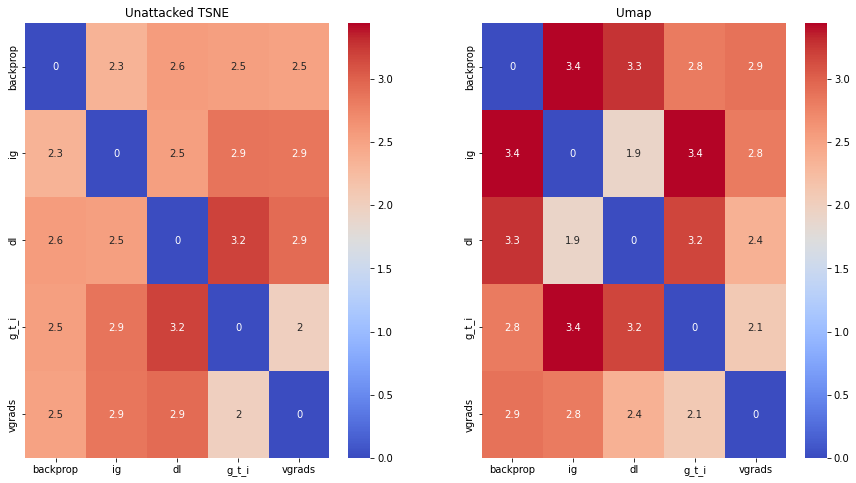

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


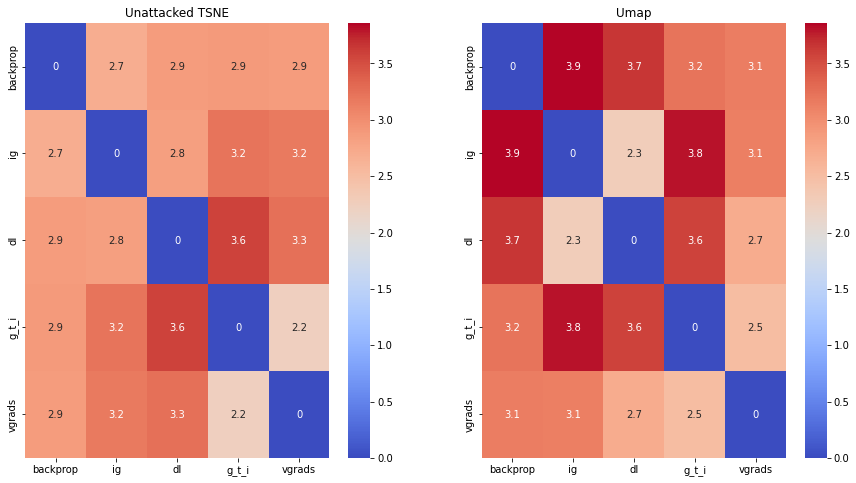

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


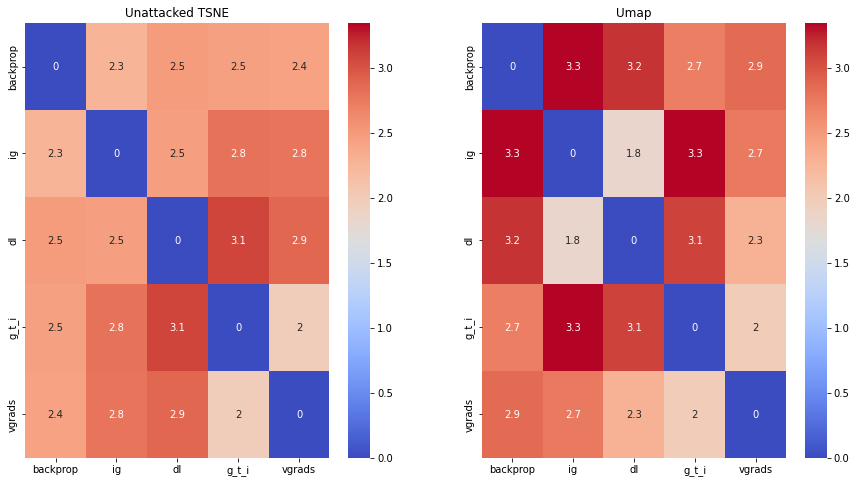

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


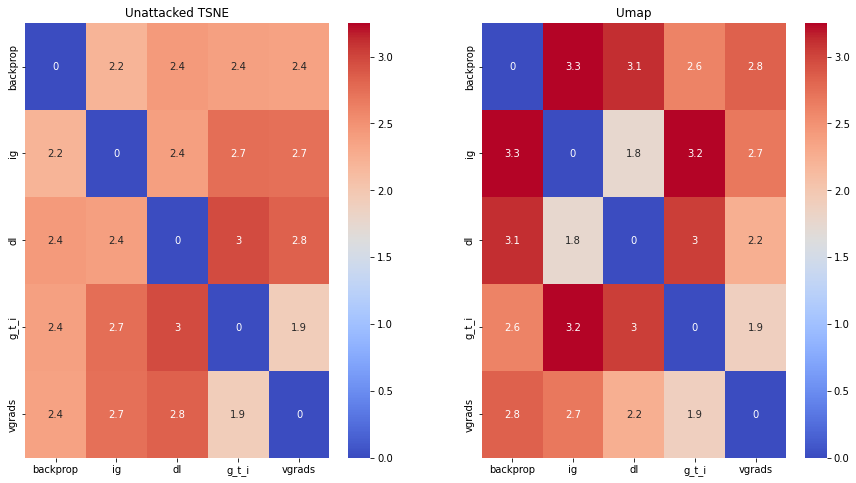

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


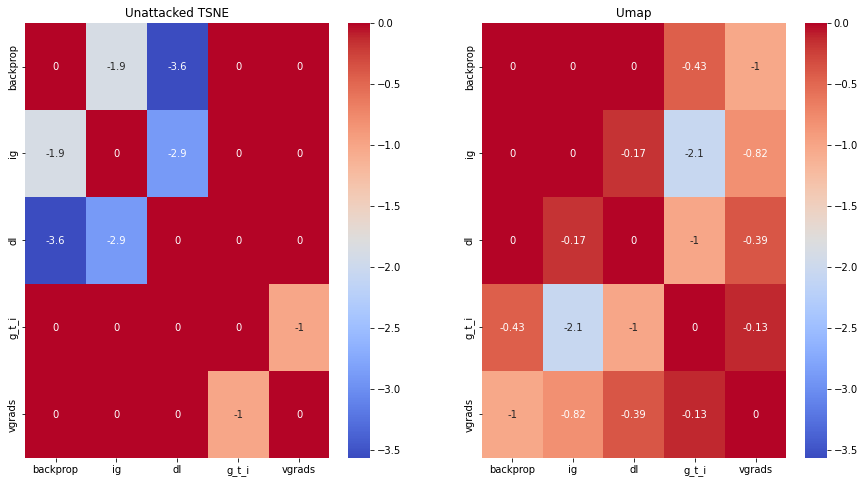

----------------------------------------------------------------------------------------------------


In [14]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_mnist_tsne), 
    distances2=apply_log_to_distances(distances_cnn_mnist_umap), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="Unattacked TSNE",
    title_distances2="Unattacked Umap"
)

----------------------------------------------------------------------------------------------------
Distance function: euclidean


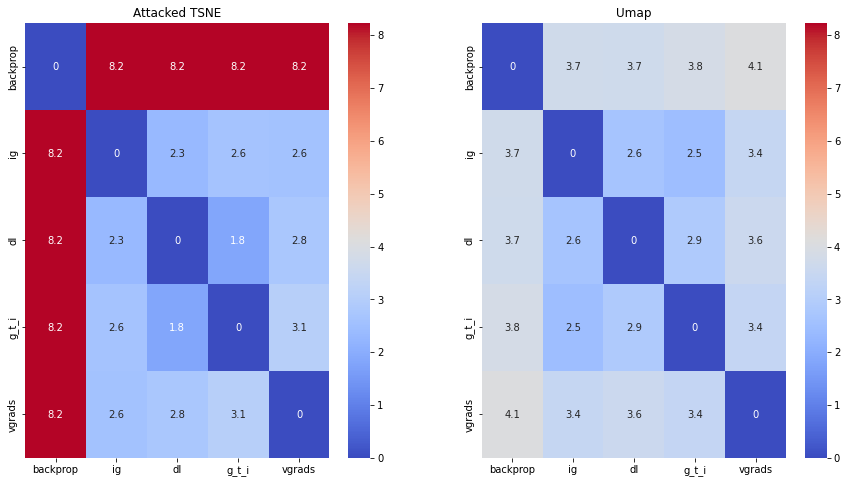

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: manhattan


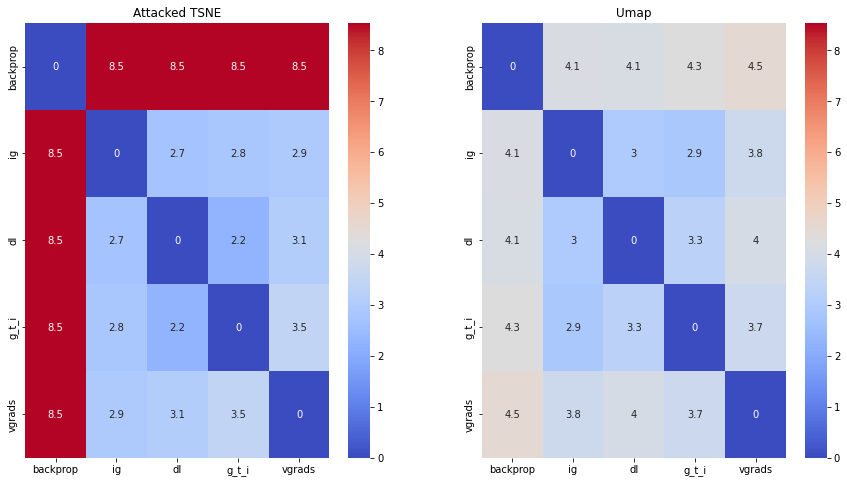

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: minkowski


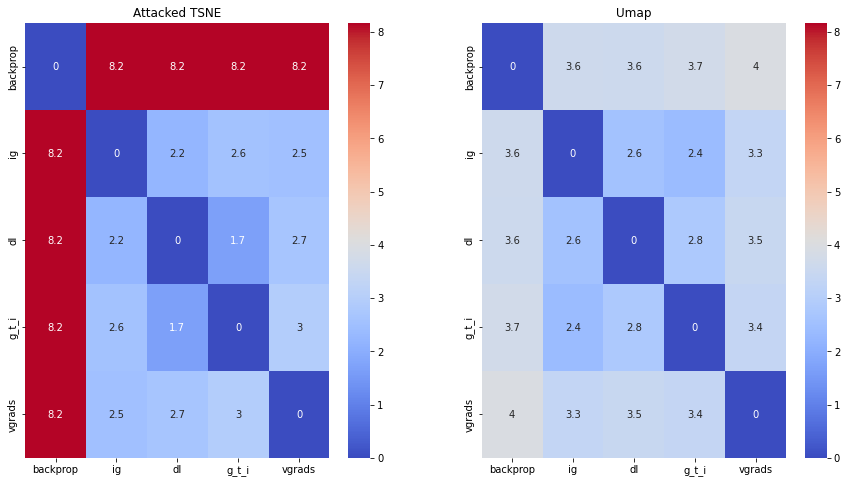

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: chebyshev


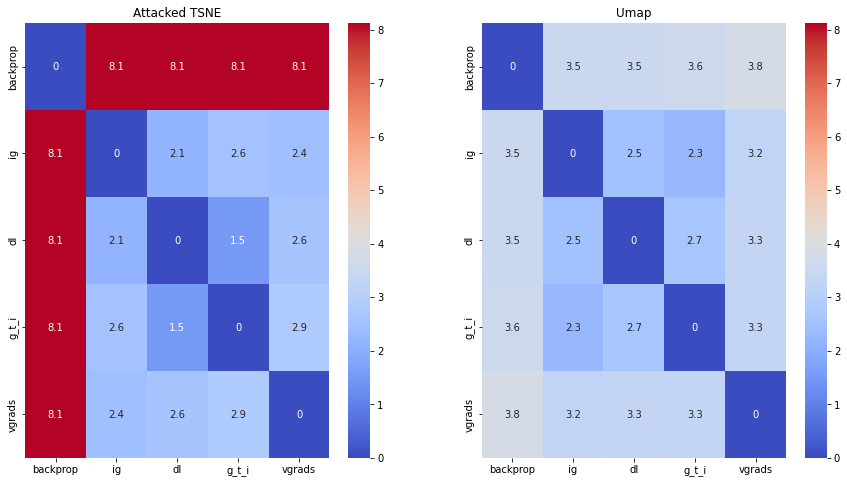

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Distance function: cosine


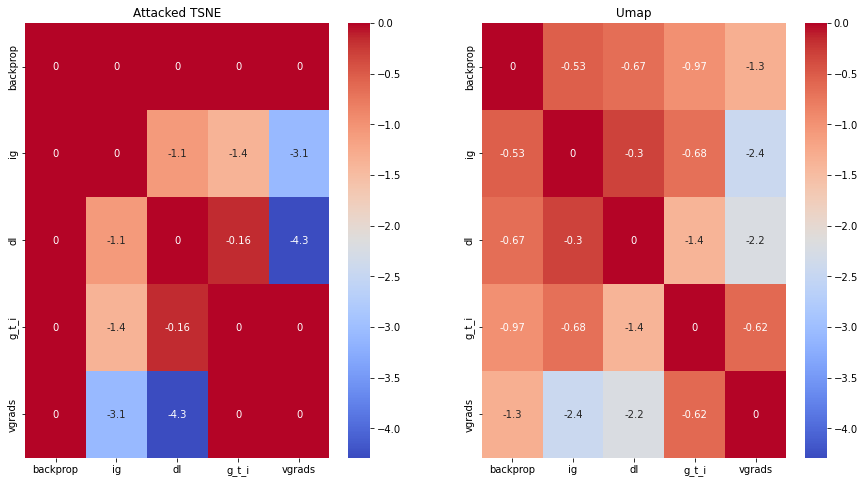

----------------------------------------------------------------------------------------------------


In [15]:
plot_comparison_heatmaps(
    distances1=apply_log_to_distances(distances_cnn_mnist_tsne2), 
    distances2=apply_log_to_distances(distances_cnn_mnist_umap2), 
    introspection_techniques=introspection_techniques, 
    distance_functions=distance_functions, 
    use_diverging=True, 
    title_distances1="RandLabels TSNE",
    title_distances2="RandLabels Umap"
)

# Reduce (MLP, MNIST) using Dim. Reduction, compare Gaussian Distributions and Plot

In [2]:
MODEL_TYPE = "mlp"
DATASET = "mnist"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams"
MAX_IMAGES = 100

In [3]:
all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)
all_grids_3 = load_all_grids_randparams(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading i

In [16]:
# Use all_grids3 like this: all_grids_3['kind']['layer'])
# Kind = Sequential / Cascading
# Layer = 0_Linear, 2_Linear, 4_Linear

## UMap

In [17]:
all_grids_1_umap = reduce_dimensionality_umap(all_grids_1, 2)
all_grids_2_umap = reduce_dimensionality_umap(all_grids_2, 2)
all_grids_3_c_umap = reduce_dimensionality_umap(all_grids_3['Cascading']['4_Linear'], 2)

Reducing dimensionality for technique g_t_i...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique vgrads...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique dl...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique ig...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique backprop...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique backprop...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique vgrads...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique dl...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique ig...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique g_t_i...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


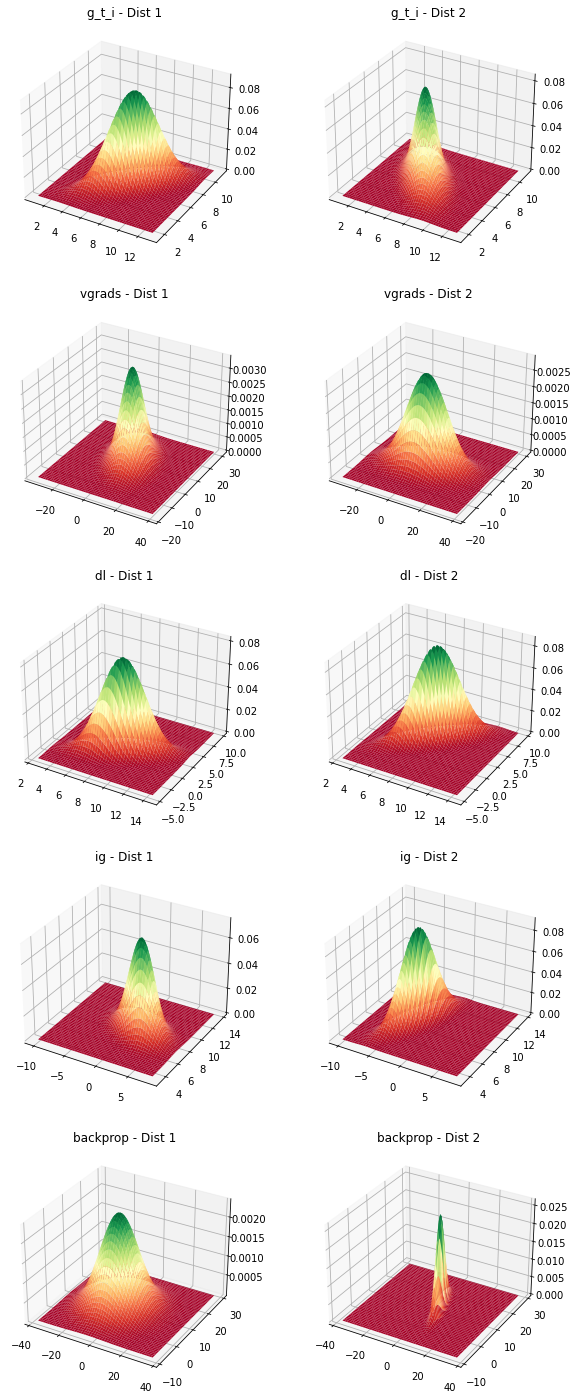

In [19]:
# left - correct || right - RandomLabels
plot_2d_distributions(all_grids_1_umap, all_grids_2_umap)

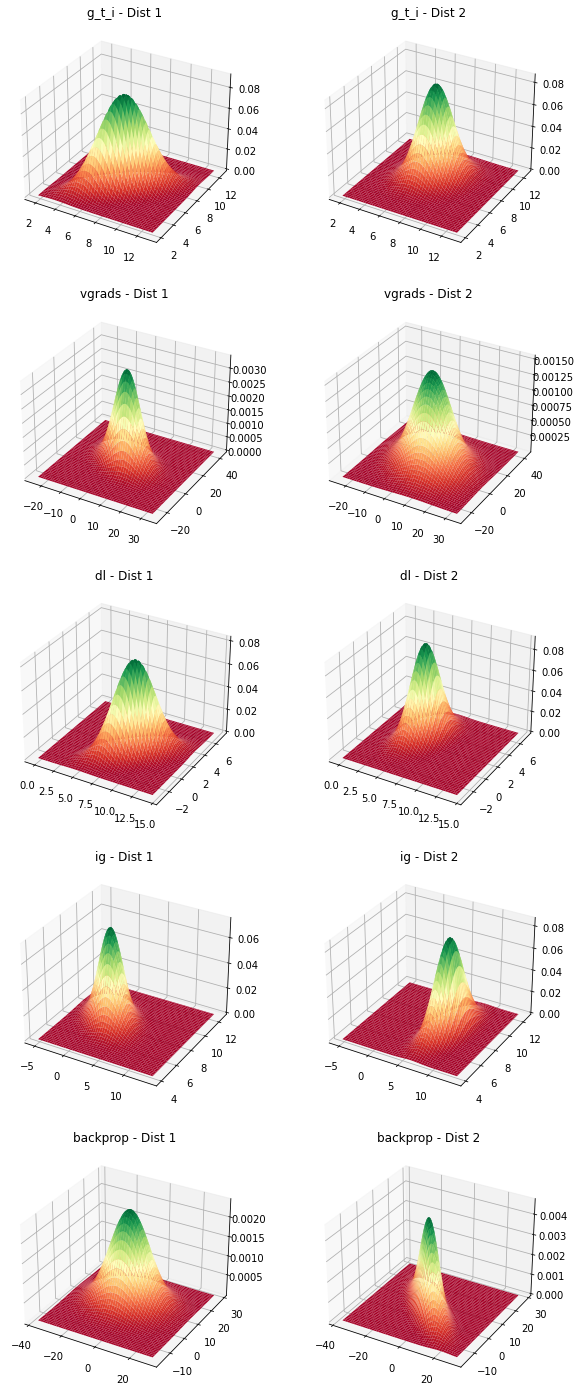

In [20]:
# left - correct || right - RandomParams
plot_2d_distributions(all_grids_1_umap, all_grids_3_c_umap)

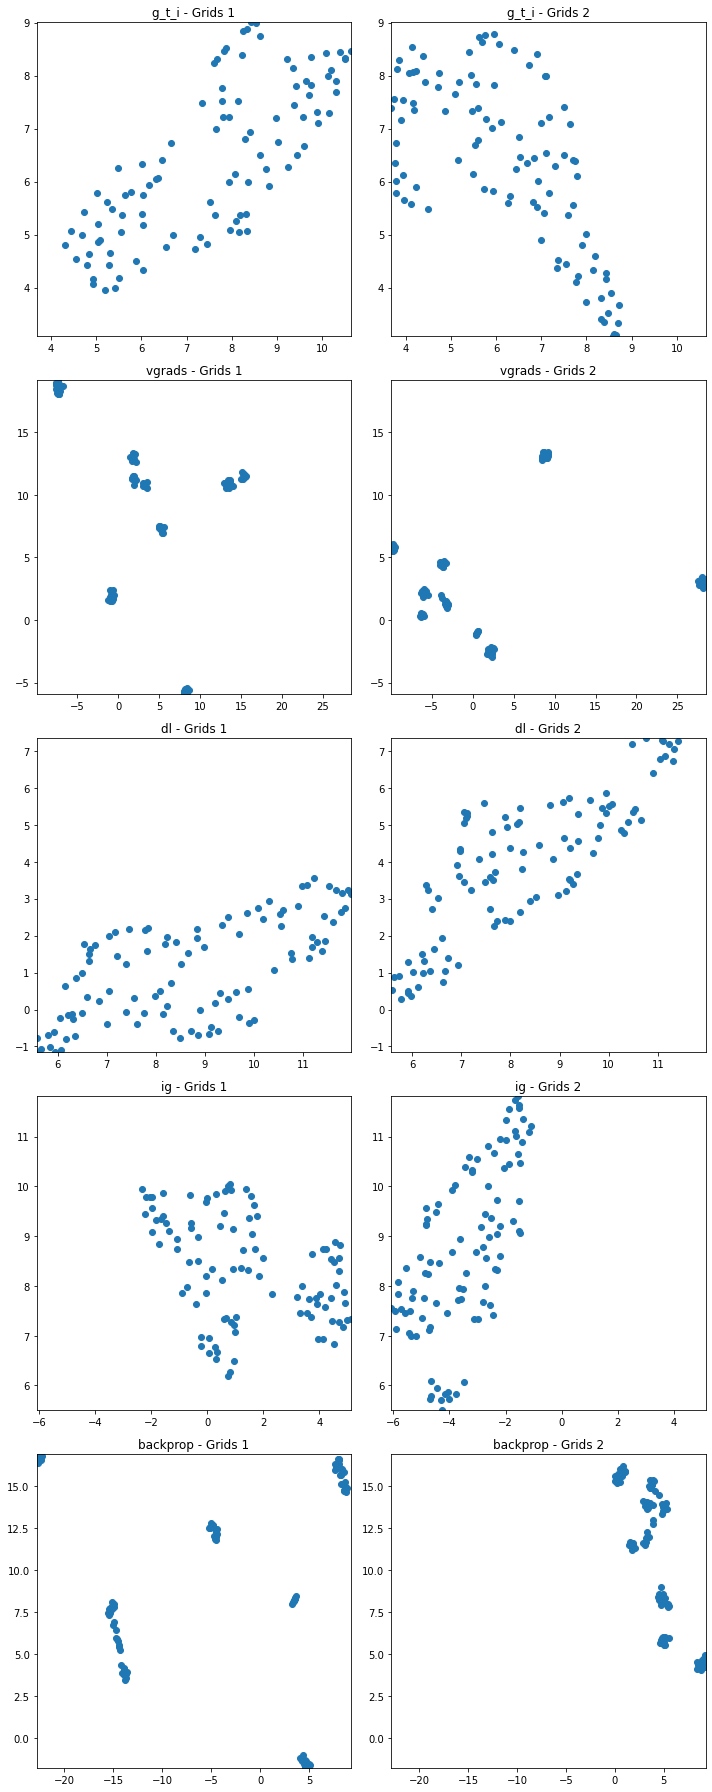

In [21]:
# left - correct || right - RandomLabels
plot_scatter(all_grids_1_umap, all_grids_2_umap)

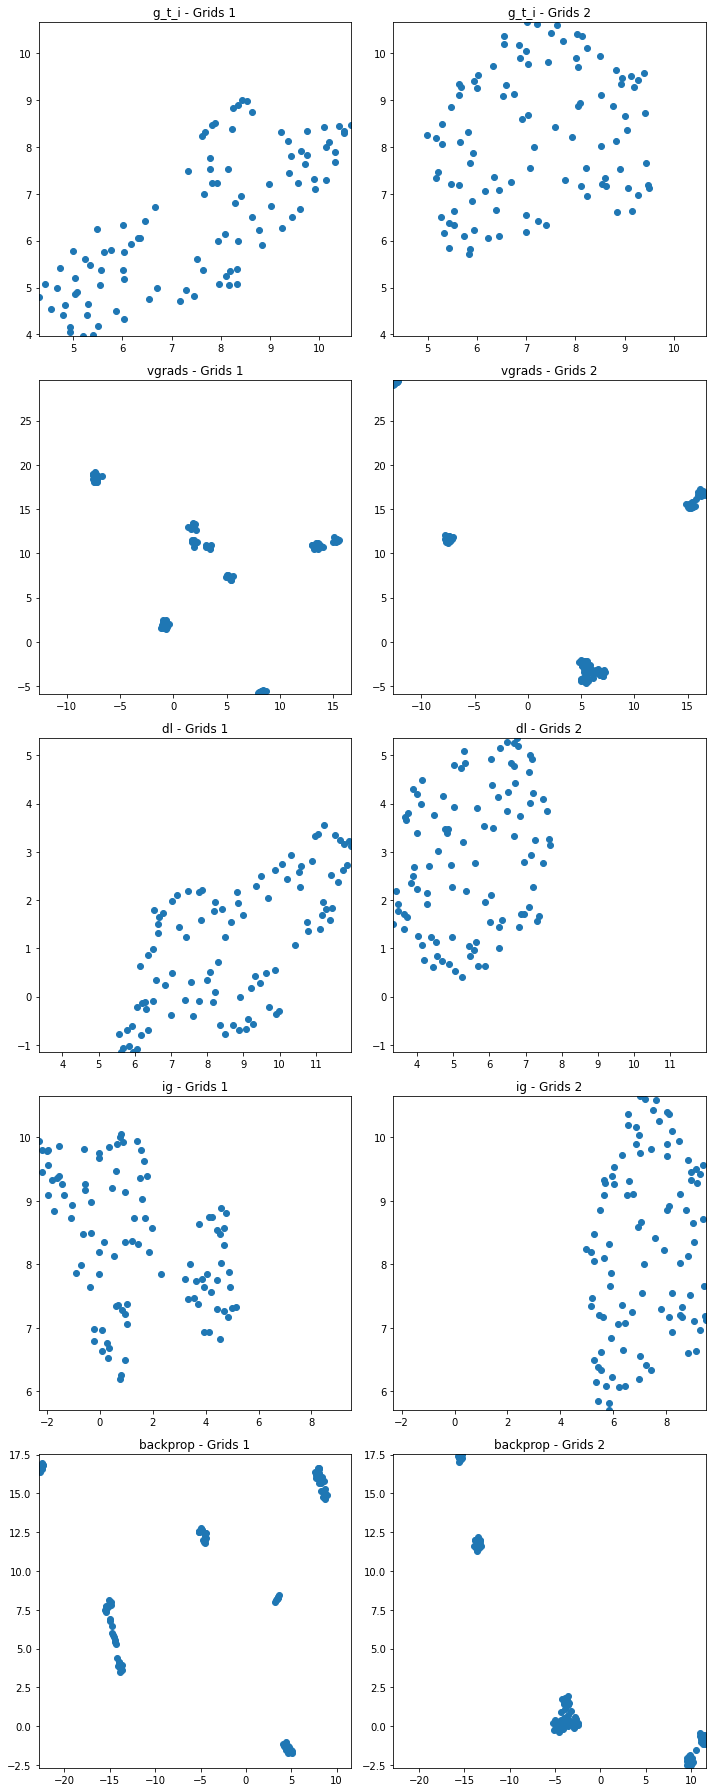

In [22]:
# left - correct || right - RandomParams
plot_scatter(all_grids_1_umap, all_grids_3_c_umap)

## tSNE 

In [10]:
all_grids_1_tsne =reduce_dimensionality_tsne(all_grids_1, 2)
all_grids_2_tsne =reduce_dimensionality_tsne(all_grids_2, 2)

Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...


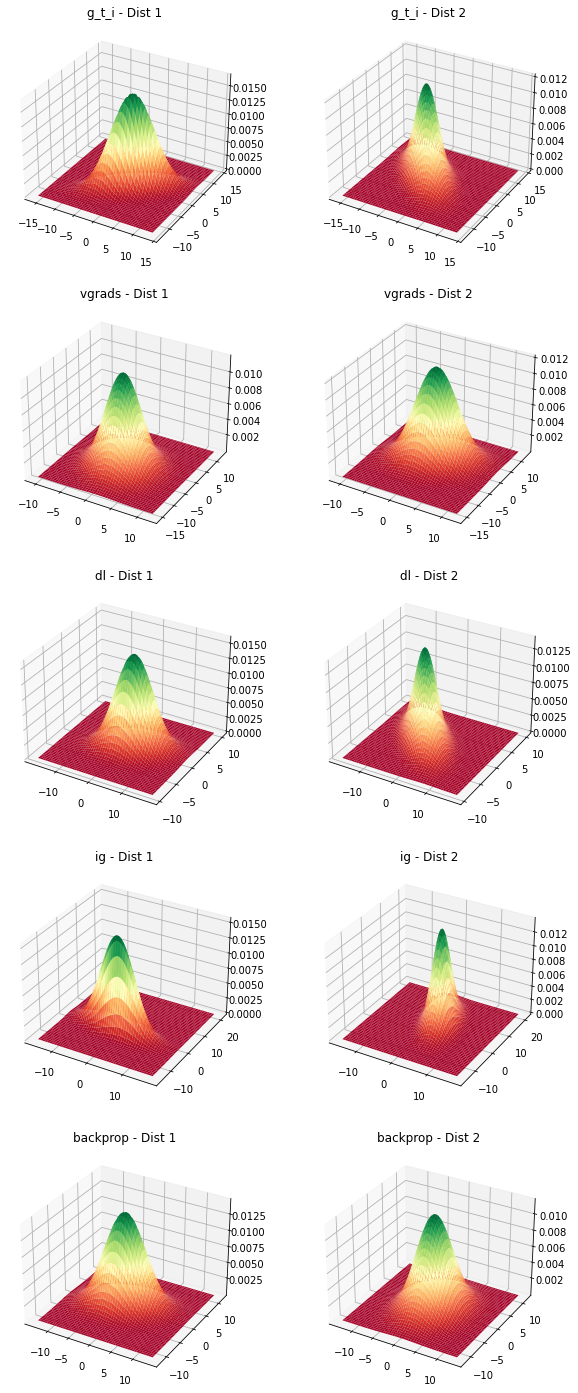

In [12]:
plot_2d_distributions(all_grids_1_tsne, all_grids_2_tsne)

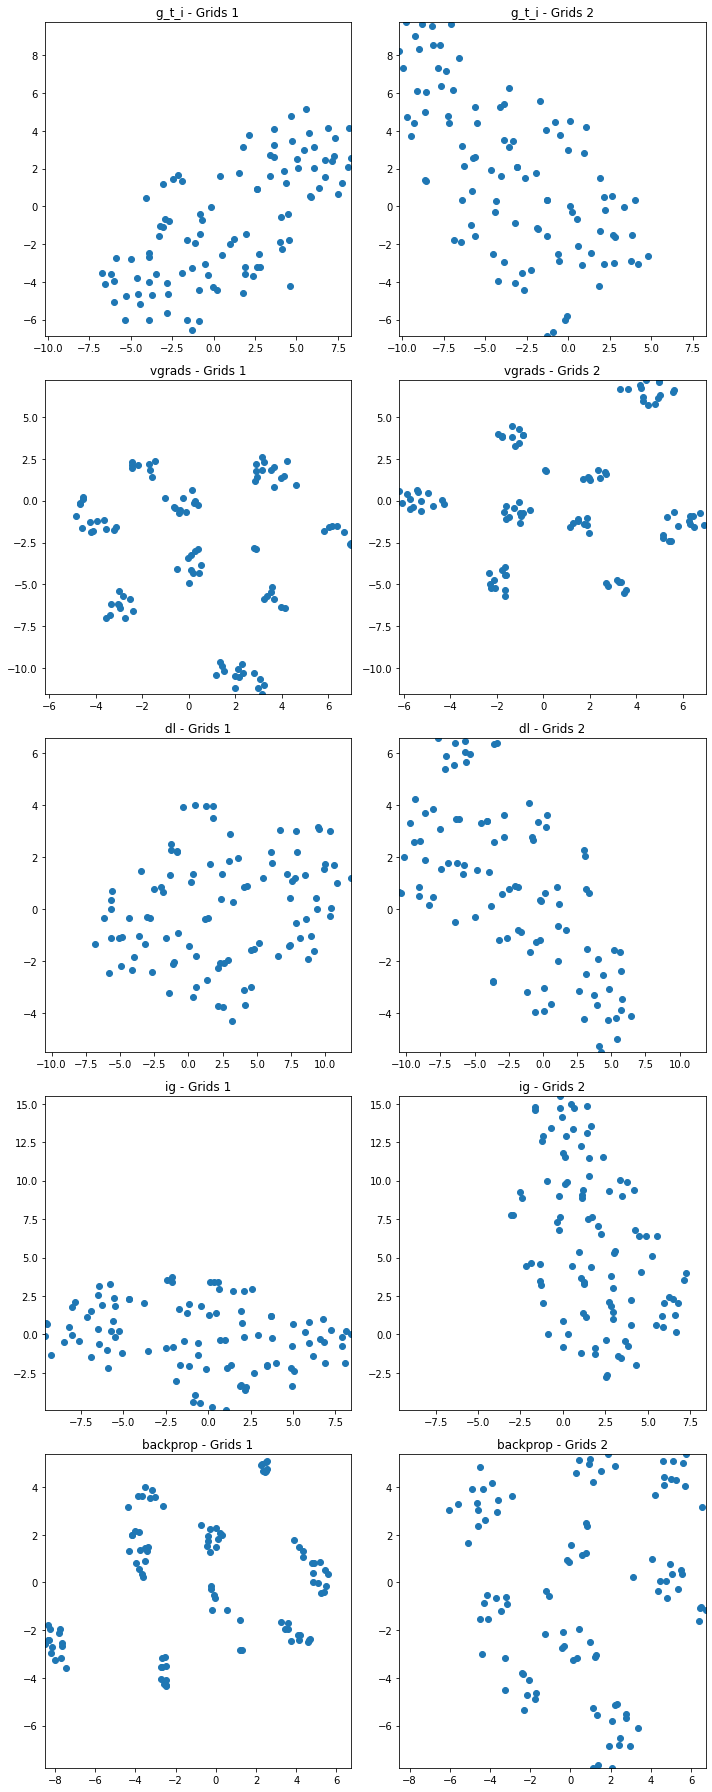

In [11]:
plot_scatter(all_grids_1_tsne, all_grids_2_tsne)

## kPCA

In [12]:
# Linear kernel
all_grids_1_kpca_linear = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='linear')
all_grids_2_kpca_linear = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='linear')

# Poly kernel
all_grids_1_kpca_poly = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='poly')
all_grids_2_kpca_poly = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='poly')

# Sigmoid kernel
all_grids_1_kpca_sigmoid = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='sigmoid')
all_grids_2_kpca_sigmoid = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='sigmoid')

# Cosine kernel
all_grids_1_kpca_cosine = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='cosine')
all_grids_2_kpca_cosine = reduce_dimensionality_kpca(all_grids_1, n_components=2, kernel='cosine')


Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique g_t_i...
Reducing dimensionali

Plots for Linear Kernel


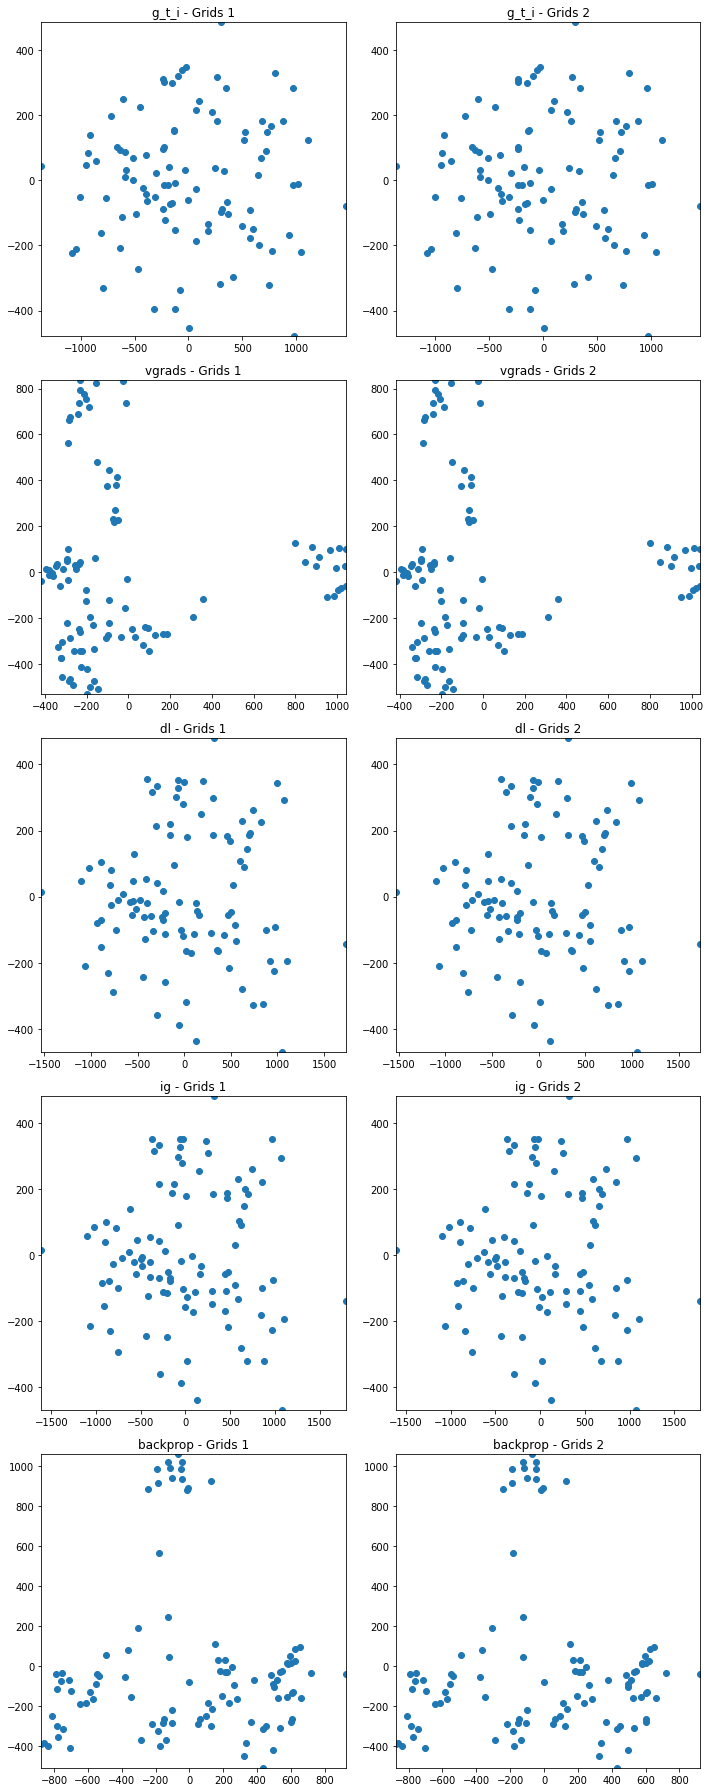

---------------------------------------------------------------------------
Plots for Poly Kernel


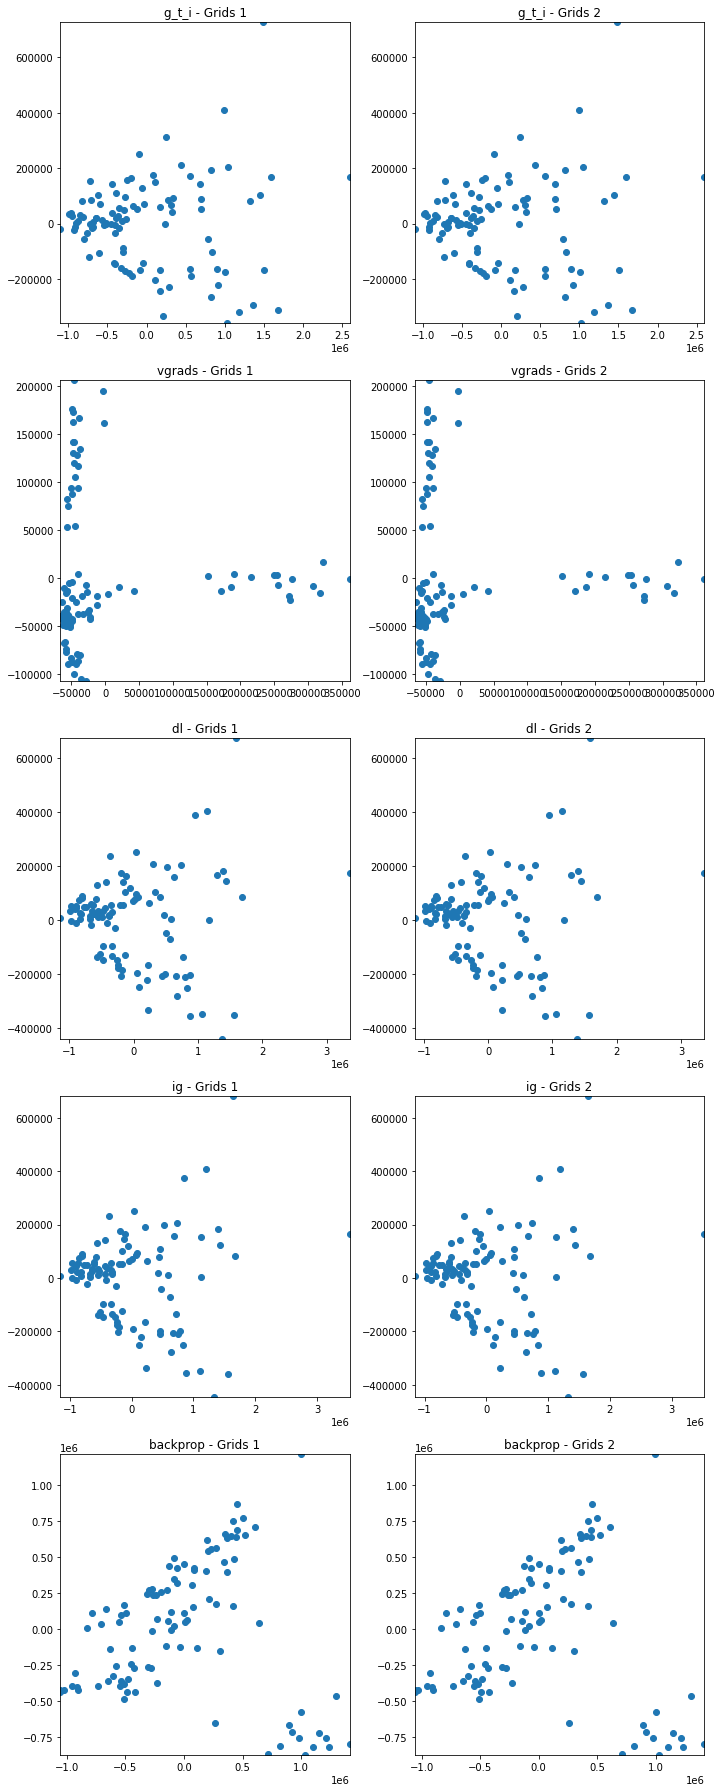

---------------------------------------------------------------------------
Plots for Cosine Kernel


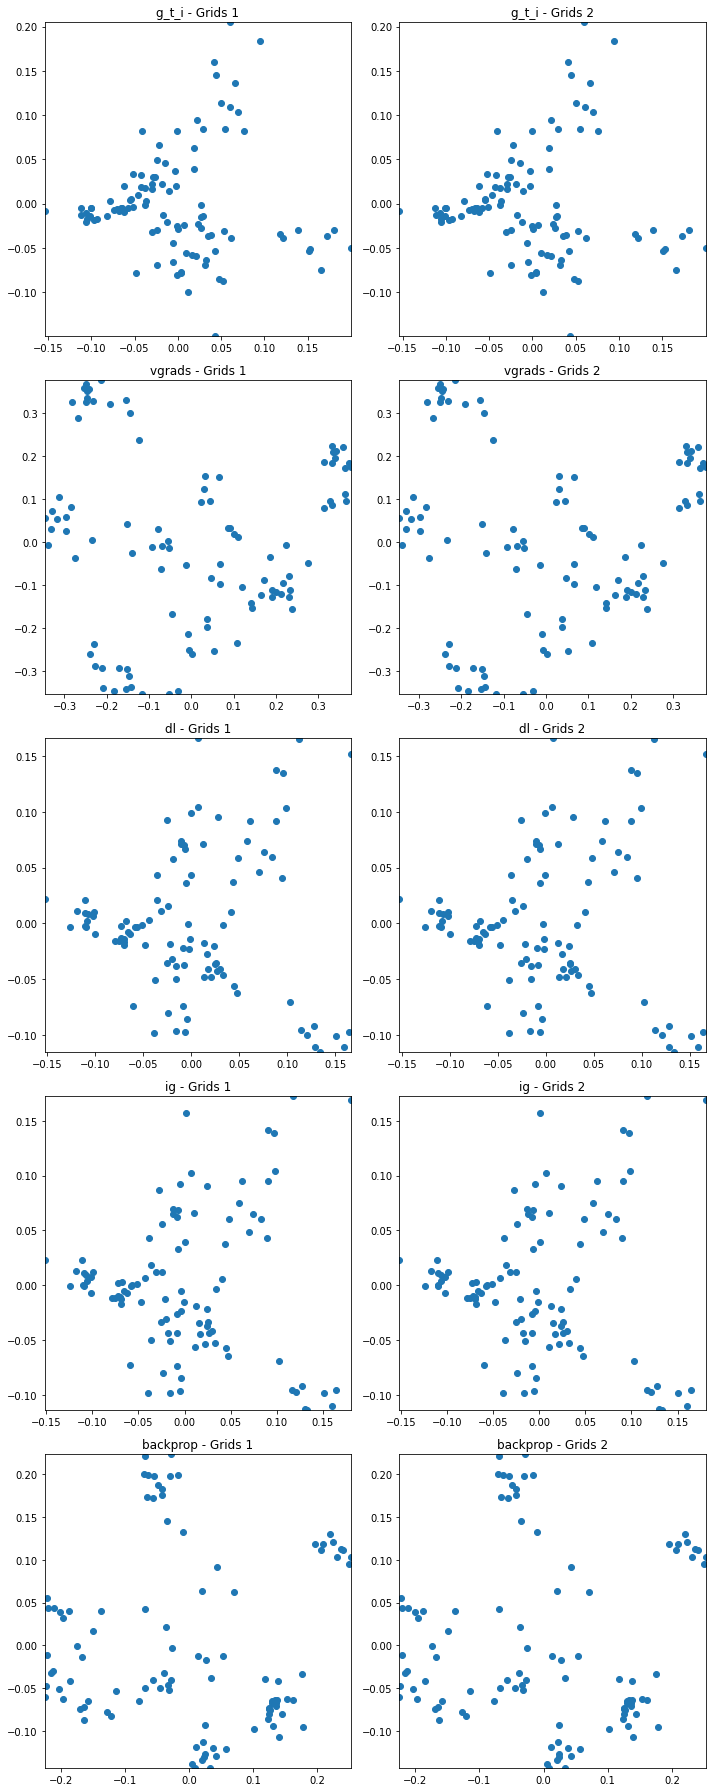

---------------------------------------------------------------------------
Plots for Sigmoid Kernel


/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:302: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i, 0].set_xlim([x_min, x_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:303: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i, 0].set_ylim([y_min, y_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:307: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i, 1].set_xlim([x_min, x_max])
/project/FoolingDetection/pytorch/lib/VisualizationProvider.py:308: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i, 1].set_ylim([y_min, y_max])


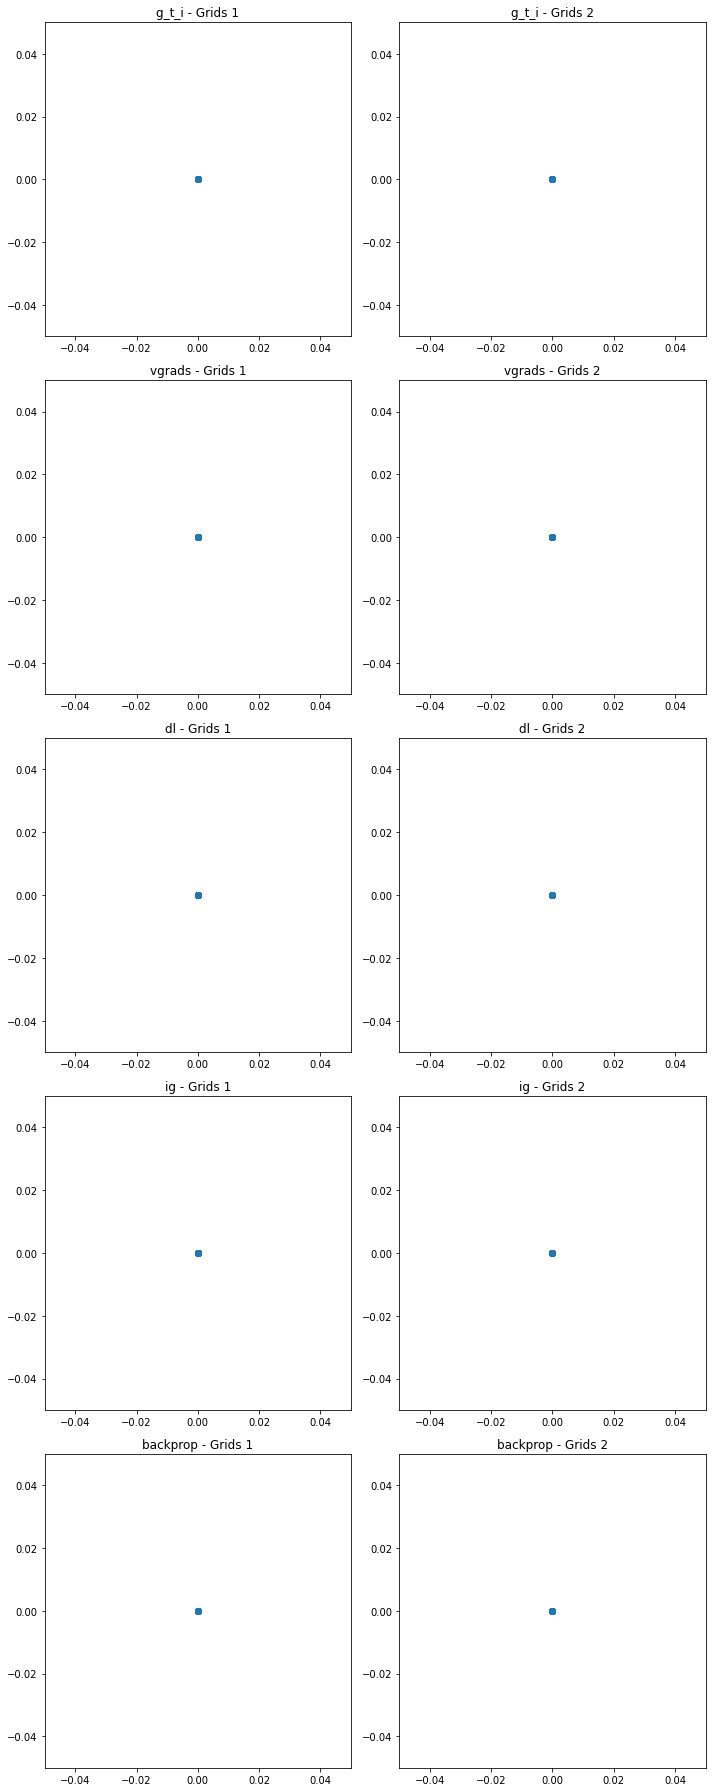

---------------------------------------------------------------------------


In [16]:
# Linear kernel
print("Plots for Linear Kernel")
plot_scatter(all_grids_1_kpca_linear, all_grids_2_kpca_linear)

print('-'*75)

# poly kernel
print("Plots for Poly Kernel")
plot_scatter(all_grids_1_kpca_poly, all_grids_2_kpca_poly)

print('-'*75)

# cosine kernel
print("Plots for Cosine Kernel")
plot_scatter(all_grids_1_kpca_cosine, all_grids_2_kpca_cosine)

print('-'*75)

# sigmoid kernel
print("Plots for Sigmoid Kernel")
plot_scatter(all_grids_1_kpca_sigmoid, all_grids_2_kpca_sigmoid)

print('-'*75)

# Inconclusive again :/
# Could something have gone wrong?

# Reduce (MLP, CIFAR) using Dim. Reduction, compare Gaussian Distributions and Plot

In [13]:
MODEL_TYPE = "mlp"
DATASET = "cifar10"
ATTACK1 = "correct"
ATTACK2 = "RandLabels"
ATTACK3 = "RandParams"
MAX_IMAGES = 100

all_grids_1 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK1, 
    max_images=MAX_IMAGES
)
all_grids_2 = load_all_grids(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK2, 
    max_images=MAX_IMAGES
)
all_grids_3 = load_all_grids_randparams(
    model_type=MODEL_TYPE, 
    dataset=DATASET, 
    attack=ATTACK3, 
    max_images=MAX_IMAGES
)

Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading image 100 out of 100 (100.00%)
Loading grids from disk...
Loading image 50 out of 100 (50.00%)
Loading i

## UMap

In [14]:
all_grids_1_umap = reduce_dimensionality_umap(all_grids_1, 2)
all_grids_2_umap = reduce_dimensionality_umap(all_grids_2, 2)

Reducing dimensionality for technique backprop...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique dl...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique vgrads...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique ig...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique g_t_i...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique g_t_i...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique backprop...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique vgrads...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique dl...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Reducing dimensionality for technique ig...


/scratch/ponel/python/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


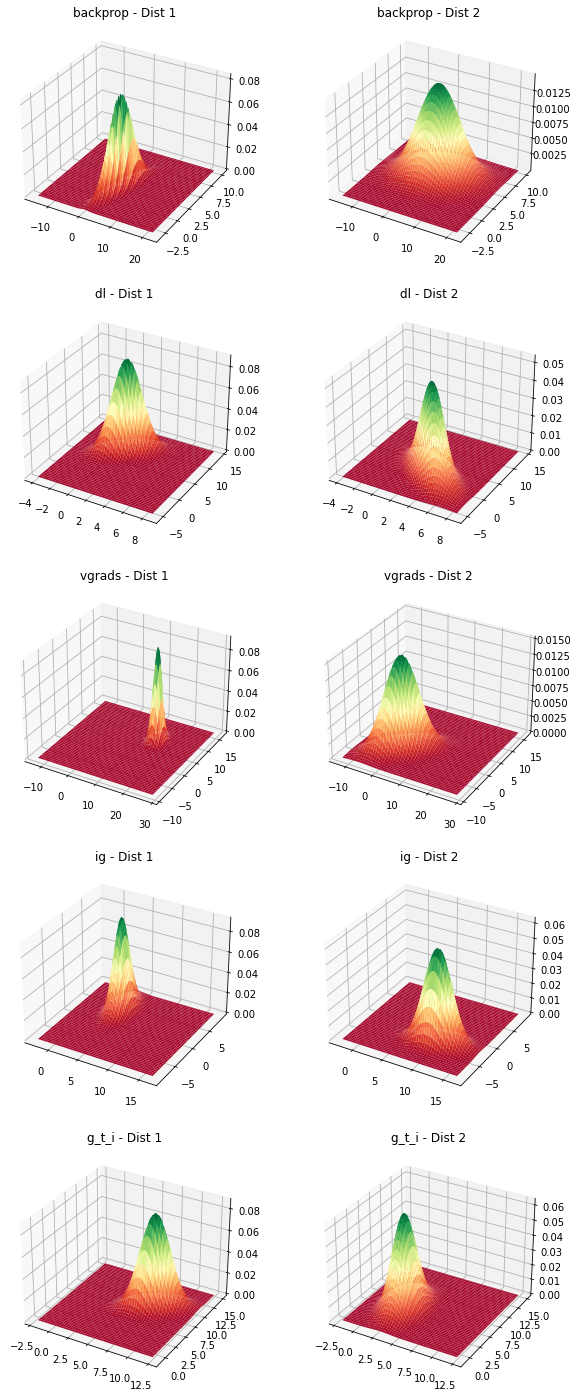

In [15]:
plot_2d_distributions(all_grids_1_umap, all_grids_2_umap)

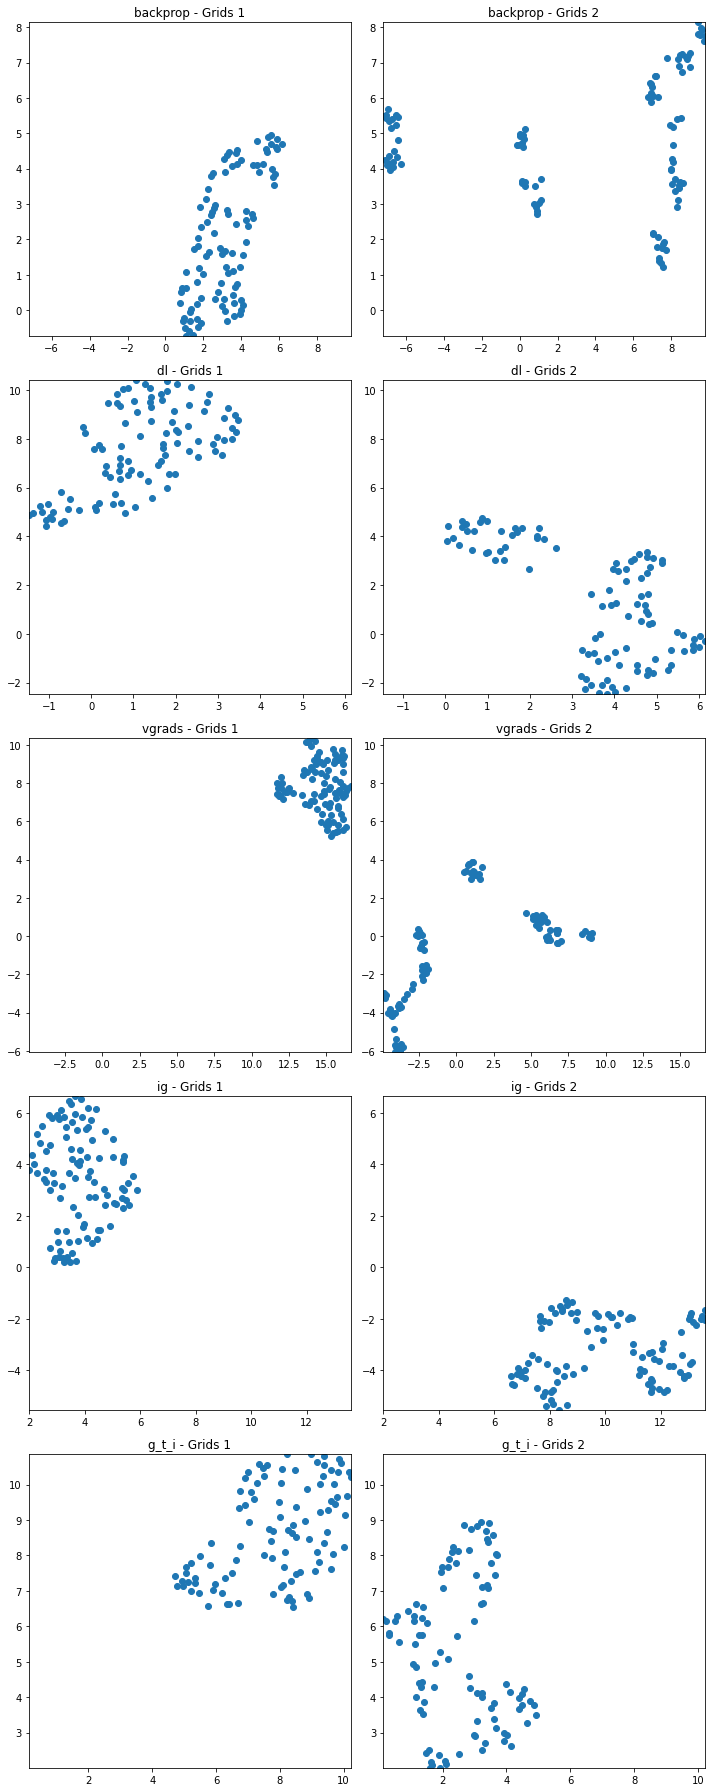

In [16]:
plot_scatter(all_grids_1_umap, all_grids_2_umap)

## tSNE 

In [17]:
all_grids_1_tsne = reduce_dimensionality_tsne(all_grids_1, 2)
all_grids_2_tsne = reduce_dimensionality_tsne(all_grids_2, 2)

Reducing dimensionality for technique backprop...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique ig...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique g_t_i...
Reducing dimensionality for technique backprop...
Reducing dimensionality for technique vgrads...
Reducing dimensionality for technique dl...
Reducing dimensionality for technique ig...


In [19]:
plot_2d_distributions(all_grids_1_tsne, all_grids_2_tsne)

KeyboardInterrupt: 

<Figure size 720x1800 with 0 Axes>

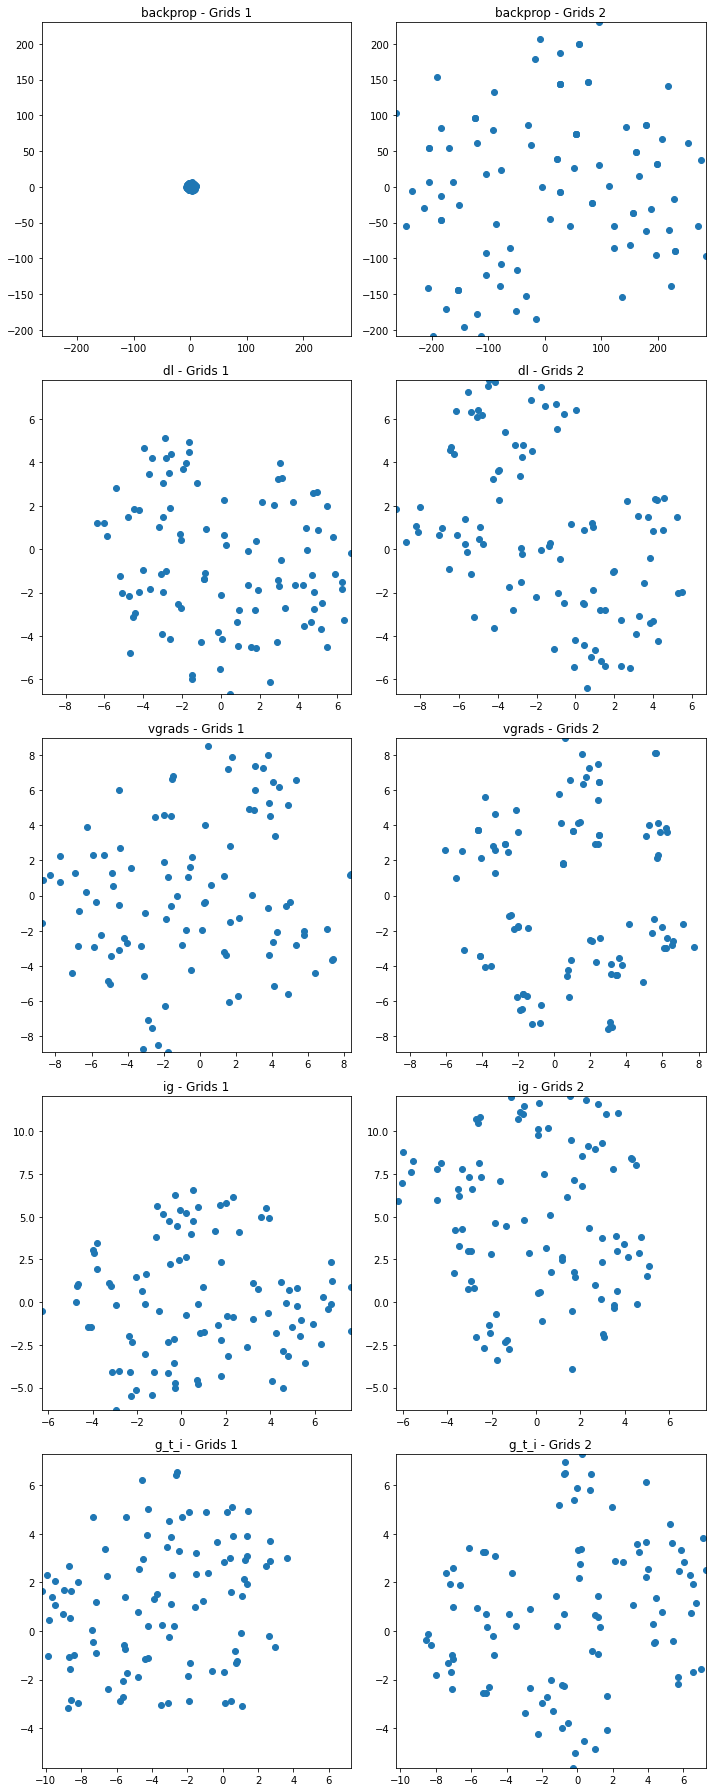

In [18]:
plot_scatter(all_grids_1_tsne, all_grids_2_tsne)